In [1]:
import spacy
import os
import pandas as pd
import re

In [2]:
nlp = spacy.load("en_core_web_md")

Theres a lot to filter, see [this](http://localhost:8889/tree/Documents/Uni/DH/Data%20Science/Projekte/Topic%20Modelling/corpus_base/16338845__IM-PRESS__20050826-IPR-01421__EN.txt).

In [3]:
# Define the folder path
folder_path = 'corpus_base'

# Initialize lists to store data
titles = []
categories = []
contents = []
filenames = []

date_pattern = r'\d{4}-\d{2}-\d{2} - \d{2}:\d{2}'
dates_pattern = r'\d{2}\.\d{2}\.\d{2}'
phone_pattern = r'\(\+\d*\)\s\d*\s\d*\s\d*'
mark_pattern = r'[A-Z]{4,}'
ref_pattern = r'\d+\w+\d+'
mail_pattern = r'.*\@.*\.eu'

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    # Check if file has .txt extension
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        
        # Read the file
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()
            
            # Extract title, category, and content
            title = lines[0].strip()
            category = lines[1].strip()
            content_lines = lines[2:]  # Exclude the first two lines
            
            # Remove weird stuff
            content_lines = [re.sub(r'\/\S*', '', line) for line in content_lines]
            content_lines = [re.sub(date_pattern, '', line) for line in content_lines]
            content_lines = [re.sub(r'\*\.jpg', '', line) for line in content_lines]
            content_lines = [re.sub(phone_pattern, '', line) for line in content_lines]
            content_lines = [re.sub(mark_pattern, '', line) for line in content_lines]
            content_lines = [re.sub(ref_pattern, '', line) for line in content_lines]
            content_lines = [re.sub(mail_pattern, '', line) for line in content_lines]
            
            # Remove batches of 3 lines
            content_lines = [line for line in content_lines if not line.startswith((r'\d', 'LINK', 'EN'))]
            
            # Join the remaining lines to form the content
            content = ' '.join(content_lines).strip()            
            
            # Append data to lists
            titles.append(title)
            categories.append(category)
            contents.append(content)
            filenames.append(file_name)

# Create a pandas dataframe
data = {
    'title': titles,
    'category': categories,
    'content': contents,
    'filename': filenames
}

df = pd.DataFrame(data)
df

,title,category,content,filename
0,EU should cooperate more with US in Mediterran...,Development and cooperation,MEPs are disappointed with the results achieve...,16338845__IM-PRESS__20050826-IPR-01421__EN.txt
1,Broader EU-China Relations Needed,External relations,A longer-term trade strategy needs to be devis...,16338859__IM-PRESS__20050907-IPR-00044__EN.txt
2,Transport Committee demands EU-wide blacklist ...,Transport,Following a number of serious air crashes earl...,16338887__IM-PRESS__20050907-IPR-00050__EN.txt
3,Compliance with Hague tribunal is key to acces...,External relations,Speaking to the Foreign Affairs Committee on 3...,16338915__IM-PRESS__20050907-IPR-00048__EN.txt
4,"Commissioner Rehn defends ""rigorous"" framework...",External relations,Appearing before the Foreign Affairs Committee...,16338929__IM-PRESS__20050826-IPR-01417__EN.txt
...,...,...,...,...
7241,Basic rights for crime victims across the EU,Judicial cooperation,"Committees Civil Liberties, Justice and Home A...",33730400__IM-PRESS__20120326-IPR-41845__EN.txt
7242,Mobile roaming: MEPs win deal with Council to ...,Information society,"Committees Industry, Research and Energy\n \n ...",33732813__IM-PRESS__20120326-IPR-41842__EN.txt
7243,Opening: President Schulz condemns Toulouse ki...,Institutions,Plenary sittings\n \n The recent callous and ...,33734304__IM-PRESS__20120328-IPR-42022__EN.txt
7244,Food aid for needy beyond 2013: Commission fol...,Agriculture,Plenary sittings\n \n In times of economic cr...,33735269__IM-PRESS__20120327-IPR-41991__EN.txt


In [4]:
stopwords = list(nlp.Defaults.stop_words)+['%', '.', "?", "!", ",", "(", ")", ":", ";", "\"", "'", "=", "-", "--en", "http", "v0", "xml", "im-", "doc", "avi", 'XML', 'DOC', 'AVI', 'IM-', '.jpg']
stoptags = ['ADP', 'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NUM', 'PART', 'PRON', 'PUNCT', 'SCONJ', 'SYM', 'SPACE']

In [5]:
stopwords

['’m',
 'is',
 'due',
 'her',
 'call',
 'him',
 'keep',
 'a',
 'now',
 'whenever',
 'it',
 'am',
 'must',
 '‘re',
 'rather',
 'without',
 'been',
 'however',
 're',
 'n’t',
 'any',
 'would',
 'whereupon',
 'could',
 'down',
 'had',
 'will',
 'along',
 'in',
 'really',
 'unless',
 'enough',
 'often',
 'seems',
 'why',
 'therefore',
 'various',
 '‘s',
 'front',
 'hence',
 'via',
 'made',
 '’ve',
 'either',
 'hereby',
 'last',
 'at',
 'something',
 'whereafter',
 'go',
 'ours',
 'mine',
 'together',
 'both',
 'another',
 "'d",
 'there',
 'or',
 'even',
 'sometime',
 'ever',
 'everyone',
 'under',
 'she',
 'whereby',
 'because',
 'whether',
 'herein',
 '’s',
 'doing',
 'some',
 'our',
 'sometimes',
 'quite',
 'its',
 "'re",
 'being',
 'seemed',
 'bottom',
 'toward',
 'these',
 'behind',
 'within',
 'used',
 'do',
 'indeed',
 'us',
 '‘d',
 '’re',
 'someone',
 'myself',
 'were',
 'beside',
 'top',
 'can',
 'much',
 'fifteen',
 'same',
 'for',
 "'ll",
 'against',
 'many',
 '’ll',
 'one',
 'al

In [6]:
df["tokens"] = df.content.apply(lambda x: [t.lemma_.lower() for t in nlp(x, disable=["parser", "ner"]) if (t.text.strip() != "" and (t.text.lower() not in stopwords) and t.pos_ not in stoptags)])

In [7]:
df.iloc[356].tokens

['united',
 'kingdom',
 'hastings',
 'beach',
 'january',
 'month',
 'think',
 'take',
 'dip',
 'sea',
 'dream',
 'summer',
 'holiday',
 'recognise',
 'bathing',
 'beach',
 'eu',
 'thank',
 'european',
 'bathing',
 'water',
 'directive',
 'system',
 'place',
 'minimum',
 'standard',
 'cleanliness',
 'water',
 'swim',
 'information',
 'help',
 'choose',
 'beach',
 'bathe',
 'mep',
 'vote',
 'revise',
 'directive',
 'update',
 'rule',
 'raise',
 'standard',
 'improve',
 'information',
 'public',
 'vote',
 'place',
 'strasbourg',
 'january',
 'text',
 'agree',
 'delegation',
 'mep',
 'environment',
 'ministers',
 'eu',
 'member',
 'states',
 'new',
 'directive',
 'come',
 'effect',
 'figure',
 'european',
 'commission',
 'show',
 'uk',
 'coastal',
 'bathing',
 'water',
 'meet',
 'minimum',
 'quality',
 'criterion',
 'set',
 'directive',
 'slight',
 'fall',
 'number',
 'progress',
 'meet',
 'directive',
 'stringent',
 'voluntary',
 'standard',
 'dramatic',
 'environment',
 'agency',
 'engl

In [8]:
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(df['tokens'])
dictionary.filter_extremes(no_below=3, no_above=0.5)

l = list(dictionary.items())
print(len(l))
print(l)

14508
[(0, 'achieve'), (1, 'action'), (2, 'add'), (3, 'adult'), (4, 'advisable'), (5, 'affairs'), (6, 'algeria'), (7, 'american'), (8, 'anneli'), (9, 'appear'), (10, 'approach'), (11, 'authority'), (12, 'bilateral'), (13, 'chair'), (14, 'change'), (15, 'cooperation'), (16, 'creation'), (17, 'de'), (18, 'declaration'), (19, 'dialogue'), (20, 'dimension'), (21, 'disappoint'), (22, 'disappointed'), (23, 'disappointment'), (24, 'document'), (25, 'economic'), (26, 'ed'), (27, 'education'), (28, 'egypt'), (29, 'elmar'), (30, 'emma'), (31, 'epp'), (32, 'euro'), (33, 'euromed'), (34, 'expert'), (35, 'explain'), (36, 'fi'), (37, 'field'), (38, 'follow'), (39, 'foreign'), (40, 'form'), (41, 'fr'), (42, 'global'), (43, 'greens'), (44, 'group'), (45, 'hearing'), (46, 'hold'), (47, 'hope'), (48, 'huge'), (49, 'human'), (50, 'hélène'), (51, 'identity'), (52, 'immigration'), (53, 'improvement'), (54, 'initiative'), (55, 'institute'), (56, 'international'), (57, 'israel'), (58, 'issue'), (59, 'jordan'

In [9]:
corpus = [dictionary.doc2bow(a) for a in df['tokens']]

In [10]:
from gensim.models import LdaMulticore

In [11]:
# We will execute topic modeling 50 times, each time with the different number of topics
max_topics = 50 
models = []

for i in range(max_topics):
    print("Training LDA with " + str(i+1) + " topics.")
    
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=i+1, workers = 12)
    models.append(lda_model)
          
print("Done.")

Training LDA with 1 topics.
Training LDA with 2 topics.
Training LDA with 3 topics.
Training LDA with 4 topics.
Training LDA with 5 topics.
Training LDA with 6 topics.
Training LDA with 7 topics.
Training LDA with 8 topics.
Training LDA with 9 topics.
Training LDA with 10 topics.
Training LDA with 11 topics.
Training LDA with 12 topics.
Training LDA with 13 topics.
Training LDA with 14 topics.
Training LDA with 15 topics.
Training LDA with 16 topics.
Training LDA with 17 topics.
Training LDA with 18 topics.
Training LDA with 19 topics.
Training LDA with 20 topics.
Training LDA with 21 topics.
Training LDA with 22 topics.
Training LDA with 23 topics.
Training LDA with 24 topics.
Training LDA with 25 topics.
Training LDA with 26 topics.
Training LDA with 27 topics.
Training LDA with 28 topics.
Training LDA with 29 topics.
Training LDA with 30 topics.
Training LDA with 31 topics.
Training LDA with 32 topics.
Training LDA with 33 topics.
Training LDA with 34 topics.
Training LDA with 35 to

In [12]:
from gensim.models import CoherenceModel

coherence_measures = ['c_uci', 'u_mass', 'c_v', 'c_npmi']
scores = pd.DataFrame(columns=coherence_measures)
for measure in coherence_measures:
    scores_temp = []
    for i in range(len(models)):
        print("Computing " + str(measure) +" for the LDA model with " + str(i+1) + " topics.")
        cm = CoherenceModel(model=models[i], corpus=corpus, texts = df["tokens"], dictionary=dictionary, coherence=measure)
        score = cm.get_coherence()
        scores_temp.append(score)
    scores[measure] = scores_temp
    print("Done with " + measure)
print("Done.")

Computing c_uci for the LDA model with 1 topics.
Computing c_uci for the LDA model with 2 topics.
Computing c_uci for the LDA model with 3 topics.
Computing c_uci for the LDA model with 4 topics.
Computing c_uci for the LDA model with 5 topics.
Computing c_uci for the LDA model with 6 topics.
Computing c_uci for the LDA model with 7 topics.
Computing c_uci for the LDA model with 8 topics.
Computing c_uci for the LDA model with 9 topics.
Computing c_uci for the LDA model with 10 topics.
Computing c_uci for the LDA model with 11 topics.
Computing c_uci for the LDA model with 12 topics.
Computing c_uci for the LDA model with 13 topics.
Computing c_uci for the LDA model with 14 topics.
Computing c_uci for the LDA model with 15 topics.
Computing c_uci for the LDA model with 16 topics.
Computing c_uci for the LDA model with 17 topics.
Computing c_uci for the LDA model with 18 topics.
Computing c_uci for the LDA model with 19 topics.
Computing c_uci for the LDA model with 20 topics.
Computing

Computing c_npmi for the LDA model with 16 topics.
Computing c_npmi for the LDA model with 17 topics.
Computing c_npmi for the LDA model with 18 topics.
Computing c_npmi for the LDA model with 19 topics.
Computing c_npmi for the LDA model with 20 topics.
Computing c_npmi for the LDA model with 21 topics.
Computing c_npmi for the LDA model with 22 topics.
Computing c_npmi for the LDA model with 23 topics.
Computing c_npmi for the LDA model with 24 topics.
Computing c_npmi for the LDA model with 25 topics.
Computing c_npmi for the LDA model with 26 topics.
Computing c_npmi for the LDA model with 27 topics.
Computing c_npmi for the LDA model with 28 topics.
Computing c_npmi for the LDA model with 29 topics.
Computing c_npmi for the LDA model with 30 topics.
Computing c_npmi for the LDA model with 31 topics.
Computing c_npmi for the LDA model with 32 topics.
Computing c_npmi for the LDA model with 33 topics.
Computing c_npmi for the LDA model with 34 topics.
Computing c_npmi for the LDA mo

In [13]:
import matplotlib.pyplot as plt
import numpy as np

num_topics = [i+1 for i in range(max_topics)]

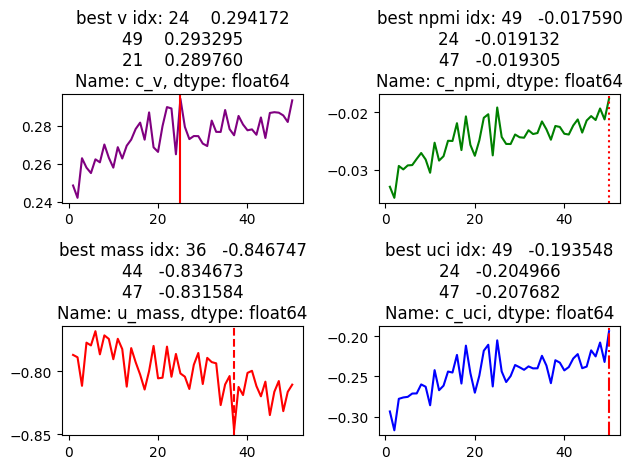

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2)
best_v = scores['c_v'].nlargest(3)

axes[0, 0].plot(num_topics, list(scores['c_v']), color='purple')
axes[0, 0].axvline(x=scores['c_v'].idxmax()+1, color='r', linestyle='solid')
axes[0, 0].set_title(f'best v idx: {best_v}')

best_npmi = scores['c_npmi'].nlargest(3)

axes[0, 1].plot(num_topics, list(scores['c_npmi']), color='green')
axes[0, 1].axvline(x=scores['c_npmi'].idxmax()+1, color='r', linestyle='dotted')
axes[0, 1].set_title(f'best npmi idx: {best_npmi}')

best_mass = scores['u_mass'].nsmallest(3)

axes[1, 0].plot(num_topics, list(scores['u_mass']), color='red')
axes[1, 0].axvline(x=scores['u_mass'].idxmin()+1, color='r', linestyle='dashed')
axes[1, 0].set_title(f'best mass idx: {best_mass}')

best_uci = scores['c_uci'].nlargest(3)
                                
axes[1, 1].plot(num_topics, list(scores['c_uci']), color='blue')
axes[1, 1].axvline(x=scores['c_uci'].idxmax()+1, color='r', linestyle='dashdot')
axes[1, 1].set_title(f'best uci idx: {best_uci}')

plt.tight_layout()
plt.show()

In [22]:
models[24].print_topics(num_words=6, num_topics=max_topics)

[(0,
  '0.006*"council" + 0.005*"right" + 0.005*"adopt" + 0.004*"service" + 0.004*"state" + 0.004*"policy"'),
 (1,
  '0.009*"states" + 0.006*"europe" + 0.005*"people" + 0.005*"right" + 0.004*"council" + 0.004*"state"'),
 (2,
  '0.006*"states" + 0.006*"debate" + 0.005*"epp" + 0.005*"national" + 0.005*"council" + 0.004*"directive"'),
 (3,
  '0.008*"europe" + 0.008*"energy" + 0.005*"people" + 0.005*"president" + 0.005*"debate" + 0.004*"epp"'),
 (4,
  '0.010*"right" + 0.006*"council" + 0.006*"states" + 0.005*"human" + 0.004*"call" + 0.004*"economic"'),
 (5,
  '0.006*"states" + 0.006*"president" + 0.005*"council" + 0.005*"debate" + 0.004*"right" + 0.004*"epp"'),
 (6,
  '0.008*"brussels" + 0.007*"president" + 0.006*"debate" + 0.006*"council" + 0.005*"epp" + 0.005*"development"'),
 (7,
  '0.006*"council" + 0.004*"states" + 0.004*"rule" + 0.004*"adopt" + 0.004*"call" + 0.004*"right"'),
 (8,
  '0.006*"council" + 0.006*"right" + 0.006*"human" + 0.005*"debate" + 0.005*"agreement" + 0.005*"resolut

In [16]:
for doc_id, doc in enumerate(corpus):
# Iterate over each document in the corpus
    # Get the topic distribution for the document
    topic_distribution = models[43].get_document_topics(doc)
    
    # Print the topic distribution for the current document
    print(f"Document ID: {doc_id}")
    for topic_id, topic_prob in topic_distribution:
        print(f"Topic ID: {topic_id}, Probability: {topic_prob}")
    print()


Document ID: 0
Topic ID: 5, Probability: 0.40746790170669556
Topic ID: 20, Probability: 0.357059508562088
Topic ID: 21, Probability: 0.22960533201694489

Document ID: 1
Topic ID: 22, Probability: 0.9974597692489624

Document ID: 2
Topic ID: 8, Probability: 0.9923614263534546

Document ID: 3
Topic ID: 11, Probability: 0.2414577752351761
Topic ID: 21, Probability: 0.7547484040260315

Document ID: 4
Topic ID: 21, Probability: 0.9949332475662231

Document ID: 5
Topic ID: 28, Probability: 0.2852720320224762
Topic ID: 33, Probability: 0.7085010409355164

Document ID: 6
Topic ID: 8, Probability: 0.5308082103729248
Topic ID: 13, Probability: 0.4659416675567627

Document ID: 7
Topic ID: 5, Probability: 0.42634445428848267
Topic ID: 10, Probability: 0.5708625912666321

Document ID: 8
Topic ID: 23, Probability: 0.6761361360549927
Topic ID: 40, Probability: 0.31991392374038696

Document ID: 9
Topic ID: 3, Probability: 0.3417380452156067
Topic ID: 7, Probability: 0.10162816196680069
Topic ID: 22, P

Document ID: 65
Topic ID: 6, Probability: 0.16605538129806519
Topic ID: 7, Probability: 0.21019406616687775
Topic ID: 16, Probability: 0.47573184967041016
Topic ID: 31, Probability: 0.14599138498306274

Document ID: 66
Topic ID: 7, Probability: 0.5292981266975403
Topic ID: 19, Probability: 0.46634161472320557

Document ID: 67
Topic ID: 1, Probability: 0.14688311517238617
Topic ID: 28, Probability: 0.13163906335830688
Topic ID: 34, Probability: 0.6691200137138367
Topic ID: 40, Probability: 0.04878857359290123

Document ID: 68
Topic ID: 7, Probability: 0.6761600375175476
Topic ID: 29, Probability: 0.3200109601020813

Document ID: 69
Topic ID: 7, Probability: 0.04683135822415352
Topic ID: 17, Probability: 0.25145962834358215
Topic ID: 20, Probability: 0.4259788393974304
Topic ID: 36, Probability: 0.27061927318573

Document ID: 70
Topic ID: 18, Probability: 0.16579191386699677
Topic ID: 31, Probability: 0.7769985198974609
Topic ID: 34, Probability: 0.05288888141512871

Document ID: 71
Topi

Document ID: 160
Topic ID: 2, Probability: 0.35044771432876587
Topic ID: 13, Probability: 0.04430621117353439
Topic ID: 41, Probability: 0.6037335991859436

Document ID: 161
Topic ID: 35, Probability: 0.9966493844985962

Document ID: 162
Topic ID: 13, Probability: 0.11654569953680038
Topic ID: 15, Probability: 0.7670291066169739
Topic ID: 18, Probability: 0.01792466640472412
Topic ID: 20, Probability: 0.09159628301858902

Document ID: 163
Topic ID: 7, Probability: 0.21375249326229095
Topic ID: 10, Probability: 0.01972741261124611
Topic ID: 17, Probability: 0.5224907398223877
Topic ID: 19, Probability: 0.055306412279605865
Topic ID: 27, Probability: 0.08137258142232895
Topic ID: 30, Probability: 0.053605347871780396
Topic ID: 41, Probability: 0.03977416083216667

Document ID: 164
Topic ID: 13, Probability: 0.9882118105888367

Document ID: 165
Topic ID: 4, Probability: 0.5006200075149536
Topic ID: 18, Probability: 0.4411367177963257
Topic ID: 38, Probability: 0.05611775070428848

Documen

Document ID: 233
Topic ID: 7, Probability: 0.10690589249134064
Topic ID: 13, Probability: 0.08092717081308365
Topic ID: 16, Probability: 0.33630260825157166
Topic ID: 17, Probability: 0.039102230221033096
Topic ID: 23, Probability: 0.08866910636425018
Topic ID: 28, Probability: 0.21158182621002197
Topic ID: 34, Probability: 0.07380042970180511
Topic ID: 38, Probability: 0.04590413719415665

Document ID: 234
Topic ID: 7, Probability: 0.5514996647834778
Topic ID: 39, Probability: 0.4418618977069855

Document ID: 235
Topic ID: 21, Probability: 0.9944405555725098

Document ID: 236
Topic ID: 3, Probability: 0.9927932620048523

Document ID: 237
Topic ID: 7, Probability: 0.25445473194122314
Topic ID: 15, Probability: 0.6461946368217468
Topic ID: 38, Probability: 0.09441516548395157

Document ID: 238
Topic ID: 15, Probability: 0.3561672270298004
Topic ID: 18, Probability: 0.2061242312192917
Topic ID: 20, Probability: 0.11052840203046799
Topic ID: 33, Probability: 0.24832743406295776
Topic ID: 

Document ID: 323
Topic ID: 7, Probability: 0.3215029835700989
Topic ID: 10, Probability: 0.07688764482736588
Topic ID: 27, Probability: 0.5925961136817932

Document ID: 324
Topic ID: 21, Probability: 0.26768702268600464
Topic ID: 36, Probability: 0.7294619083404541

Document ID: 325
Topic ID: 22, Probability: 0.09597917646169662
Topic ID: 29, Probability: 0.5433599352836609
Topic ID: 33, Probability: 0.3556980490684509

Document ID: 326
Topic ID: 7, Probability: 0.7302549481391907
Topic ID: 39, Probability: 0.2579578459262848

Document ID: 327
Topic ID: 4, Probability: 0.05581626668572426
Topic ID: 10, Probability: 0.6609411239624023
Topic ID: 30, Probability: 0.13969790935516357
Topic ID: 37, Probability: 0.0828474909067154
Topic ID: 38, Probability: 0.0598522387444973

Document ID: 328
Topic ID: 2, Probability: 0.70132976770401
Topic ID: 31, Probability: 0.2795729339122772

Document ID: 329
Topic ID: 29, Probability: 0.01968221552670002
Topic ID: 31, Probability: 0.4311080276966095
T

Document ID: 397
Topic ID: 4, Probability: 0.8710657954216003
Topic ID: 5, Probability: 0.12373903393745422

Document ID: 398
Topic ID: 3, Probability: 0.33835604786872864
Topic ID: 10, Probability: 0.30642226338386536
Topic ID: 30, Probability: 0.34899988770484924

Document ID: 399
Topic ID: 12, Probability: 0.3256203234195709
Topic ID: 29, Probability: 0.6612827777862549

Document ID: 400
Topic ID: 0, Probability: 0.1483168751001358
Topic ID: 8, Probability: 0.6570380926132202
Topic ID: 38, Probability: 0.19039951264858246

Document ID: 401
Topic ID: 2, Probability: 0.28811466693878174
Topic ID: 34, Probability: 0.7030249238014221

Document ID: 402
Topic ID: 19, Probability: 0.6037008166313171
Topic ID: 38, Probability: 0.39212071895599365

Document ID: 403
Topic ID: 8, Probability: 0.3227209150791168
Topic ID: 10, Probability: 0.5333879590034485
Topic ID: 32, Probability: 0.0689777284860611
Topic ID: 38, Probability: 0.07449555397033691

Document ID: 404
Topic ID: 21, Probability: 0

Document ID: 475
Topic ID: 24, Probability: 0.8648137450218201
Topic ID: 40, Probability: 0.13101285696029663

Document ID: 476
Topic ID: 16, Probability: 0.9949561953544617

Document ID: 477
Topic ID: 6, Probability: 0.10778240114450455
Topic ID: 13, Probability: 0.08921226114034653
Topic ID: 23, Probability: 0.8013675808906555

Document ID: 478
Topic ID: 33, Probability: 0.5919412970542908
Topic ID: 37, Probability: 0.40379172563552856

Document ID: 479
Topic ID: 7, Probability: 0.32370299100875854
Topic ID: 23, Probability: 0.21886323392391205
Topic ID: 42, Probability: 0.4539273679256439

Document ID: 480
Topic ID: 17, Probability: 0.4557859003543854
Topic ID: 26, Probability: 0.13455486297607422
Topic ID: 40, Probability: 0.4052157998085022

Document ID: 481
Topic ID: 2, Probability: 0.23503027856349945
Topic ID: 4, Probability: 0.2859957814216614
Topic ID: 20, Probability: 0.3376619517803192
Topic ID: 30, Probability: 0.056942857801914215
Topic ID: 38, Probability: 0.083761870861

Document ID: 546
Topic ID: 5, Probability: 0.620832622051239
Topic ID: 38, Probability: 0.3733050525188446

Document ID: 547
Topic ID: 4, Probability: 0.38108840584754944
Topic ID: 7, Probability: 0.08820510655641556
Topic ID: 11, Probability: 0.2748686969280243
Topic ID: 18, Probability: 0.07790251821279526
Topic ID: 36, Probability: 0.17548489570617676

Document ID: 548
Topic ID: 2, Probability: 0.018397828564047813
Topic ID: 8, Probability: 0.29986336827278137
Topic ID: 13, Probability: 0.310809850692749
Topic ID: 30, Probability: 0.1056472435593605
Topic ID: 37, Probability: 0.25721949338912964

Document ID: 549
Topic ID: 16, Probability: 0.8995219469070435
Topic ID: 31, Probability: 0.09438835829496384

Document ID: 550
Topic ID: 2, Probability: 0.6367457509040833
Topic ID: 13, Probability: 0.23335596919059753
Topic ID: 20, Probability: 0.012646309100091457
Topic ID: 37, Probability: 0.11422363668680191

Document ID: 551
Topic ID: 0, Probability: 0.09842536598443985
Topic ID: 13, 

Document ID: 623
Topic ID: 4, Probability: 0.03940710425376892
Topic ID: 5, Probability: 0.012424478307366371
Topic ID: 7, Probability: 0.05794961377978325
Topic ID: 10, Probability: 0.0536491833627224
Topic ID: 13, Probability: 0.10164906084537506
Topic ID: 14, Probability: 0.012571417726576328
Topic ID: 17, Probability: 0.06142912432551384
Topic ID: 28, Probability: 0.13274426758289337
Topic ID: 29, Probability: 0.021505089476704597
Topic ID: 30, Probability: 0.20925654470920563
Topic ID: 33, Probability: 0.01908770203590393
Topic ID: 37, Probability: 0.06141560524702072
Topic ID: 38, Probability: 0.18863198161125183

Document ID: 624
Topic ID: 26, Probability: 0.9965423941612244

Document ID: 625
Topic ID: 26, Probability: 0.9981571435928345

Document ID: 626
Topic ID: 25, Probability: 0.9904111623764038

Document ID: 627
Topic ID: 26, Probability: 0.16442184150218964
Topic ID: 29, Probability: 0.8279373049736023

Document ID: 628
Topic ID: 1, Probability: 0.5567320585250854
Topic I

Document ID: 704
Topic ID: 7, Probability: 0.18530286848545074
Topic ID: 10, Probability: 0.037897318601608276
Topic ID: 16, Probability: 0.023084159940481186
Topic ID: 17, Probability: 0.037291355431079865
Topic ID: 27, Probability: 0.41958069801330566
Topic ID: 30, Probability: 0.11036462336778641
Topic ID: 38, Probability: 0.13257767260074615
Topic ID: 41, Probability: 0.05300897732377052

Document ID: 705
Topic ID: 12, Probability: 0.13526058197021484
Topic ID: 13, Probability: 0.737354040145874
Topic ID: 34, Probability: 0.12452805042266846

Document ID: 706
Topic ID: 17, Probability: 0.21426688134670258
Topic ID: 20, Probability: 0.7712265253067017

Document ID: 707
Topic ID: 2, Probability: 0.5425409078598022
Topic ID: 6, Probability: 0.3629847466945648
Topic ID: 28, Probability: 0.05722520127892494
Topic ID: 29, Probability: 0.03476802259683609

Document ID: 708
Topic ID: 6, Probability: 0.5007281303405762
Topic ID: 20, Probability: 0.10960462689399719
Topic ID: 24, Probability

Document ID: 778
Topic ID: 12, Probability: 0.42331787943840027
Topic ID: 15, Probability: 0.10497146844863892
Topic ID: 20, Probability: 0.4644157290458679

Document ID: 779
Topic ID: 18, Probability: 0.06125929206609726
Topic ID: 20, Probability: 0.48330047726631165
Topic ID: 28, Probability: 0.4521164000034332

Document ID: 780
Topic ID: 7, Probability: 0.11383344233036041
Topic ID: 10, Probability: 0.1660032719373703
Topic ID: 11, Probability: 0.013308447785675526
Topic ID: 16, Probability: 0.09500440210103989
Topic ID: 17, Probability: 0.10371752083301544
Topic ID: 18, Probability: 0.06882984191179276
Topic ID: 38, Probability: 0.15677963197231293
Topic ID: 39, Probability: 0.18257810175418854
Topic ID: 41, Probability: 0.030816558748483658
Topic ID: 42, Probability: 0.04085545986890793

Document ID: 781
Topic ID: 14, Probability: 0.2863813638687134
Topic ID: 20, Probability: 0.7019584774971008

Document ID: 782
Topic ID: 20, Probability: 0.21248914301395416
Topic ID: 34, Probabil

Document ID: 852
Topic ID: 0, Probability: 0.5892896056175232
Topic ID: 38, Probability: 0.40790653228759766

Document ID: 853
Topic ID: 20, Probability: 0.6502769589424133
Topic ID: 28, Probability: 0.3447721600532532

Document ID: 854
Topic ID: 7, Probability: 0.1001378744840622
Topic ID: 29, Probability: 0.10482747107744217
Topic ID: 38, Probability: 0.3845396339893341
Topic ID: 39, Probability: 0.4095764458179474

Document ID: 855
Topic ID: 13, Probability: 0.2379727065563202
Topic ID: 18, Probability: 0.7559390664100647

Document ID: 856
Topic ID: 19, Probability: 0.8776811361312866
Topic ID: 30, Probability: 0.045702364295721054
Topic ID: 31, Probability: 0.07454217970371246

Document ID: 857
Topic ID: 5, Probability: 0.08462241291999817
Topic ID: 18, Probability: 0.4492446780204773
Topic ID: 30, Probability: 0.32656392455101013
Topic ID: 38, Probability: 0.03809947520494461
Topic ID: 39, Probability: 0.09855116903781891

Document ID: 858
Topic ID: 17, Probability: 0.026372713968

Document ID: 926
Topic ID: 10, Probability: 0.1030813604593277
Topic ID: 13, Probability: 0.08434595912694931
Topic ID: 17, Probability: 0.1431066393852234
Topic ID: 18, Probability: 0.36585769057273865
Topic ID: 22, Probability: 0.3013719618320465

Document ID: 927
Topic ID: 3, Probability: 0.6462602615356445
Topic ID: 7, Probability: 0.3417920470237732

Document ID: 928
Topic ID: 7, Probability: 0.260196328163147
Topic ID: 41, Probability: 0.7367026805877686

Document ID: 929
Topic ID: 1, Probability: 0.105149045586586
Topic ID: 3, Probability: 0.24408671259880066
Topic ID: 30, Probability: 0.6471690535545349

Document ID: 930
Topic ID: 12, Probability: 0.09029409289360046
Topic ID: 19, Probability: 0.7285442352294922
Topic ID: 30, Probability: 0.17821846902370453

Document ID: 931
Topic ID: 10, Probability: 0.6686500906944275
Topic ID: 17, Probability: 0.010650631971657276
Topic ID: 38, Probability: 0.02179708704352379
Topic ID: 39, Probability: 0.2971849739551544

Document ID: 932


Document ID: 1007
Topic ID: 20, Probability: 0.993522584438324

Document ID: 1008
Topic ID: 13, Probability: 0.03197943791747093
Topic ID: 14, Probability: 0.11698298901319504
Topic ID: 17, Probability: 0.47549259662628174
Topic ID: 29, Probability: 0.3742523491382599

Document ID: 1009
Topic ID: 13, Probability: 0.34000515937805176
Topic ID: 18, Probability: 0.40138474106788635
Topic ID: 20, Probability: 0.2554490268230438

Document ID: 1010
Topic ID: 13, Probability: 0.4800789952278137
Topic ID: 18, Probability: 0.368717759847641
Topic ID: 20, Probability: 0.14913973212242126

Document ID: 1011
Topic ID: 21, Probability: 0.7658632397651672
Topic ID: 39, Probability: 0.2281544953584671

Document ID: 1012
Topic ID: 7, Probability: 0.26425397396087646
Topic ID: 10, Probability: 0.30772989988327026
Topic ID: 11, Probability: 0.019156618043780327
Topic ID: 14, Probability: 0.0645318329334259
Topic ID: 18, Probability: 0.1139473170042038
Topic ID: 19, Probability: 0.016701970249414444
Topi

Document ID: 1087
Topic ID: 18, Probability: 0.6009388566017151
Topic ID: 27, Probability: 0.13680928945541382
Topic ID: 39, Probability: 0.26050159335136414

Document ID: 1088
Topic ID: 6, Probability: 0.06520126014947891
Topic ID: 25, Probability: 0.0627092644572258
Topic ID: 30, Probability: 0.035174719989299774
Topic ID: 36, Probability: 0.39399024844169617
Topic ID: 37, Probability: 0.039324305951595306
Topic ID: 38, Probability: 0.4021163880825043

Document ID: 1089
Topic ID: 20, Probability: 0.6097254157066345
Topic ID: 34, Probability: 0.1232130154967308
Topic ID: 42, Probability: 0.2586183249950409

Document ID: 1090
Topic ID: 7, Probability: 0.3273218274116516
Topic ID: 10, Probability: 0.6697106957435608

Document ID: 1091
Topic ID: 35, Probability: 0.996005654335022

Document ID: 1092
Topic ID: 20, Probability: 0.7895086407661438
Topic ID: 34, Probability: 0.2043592631816864

Document ID: 1093
Topic ID: 7, Probability: 0.9962389469146729

Document ID: 1094
Topic ID: 2, Prob

Document ID: 1172
Topic ID: 21, Probability: 0.2584209442138672
Topic ID: 31, Probability: 0.7384346723556519

Document ID: 1173
Topic ID: 12, Probability: 0.5621477961540222
Topic ID: 18, Probability: 0.09298379719257355
Topic ID: 20, Probability: 0.33829814195632935

Document ID: 1174
Topic ID: 0, Probability: 0.10348297655582428
Topic ID: 3, Probability: 0.10364090651273727
Topic ID: 10, Probability: 0.4373440444469452
Topic ID: 22, Probability: 0.031052101403474808
Topic ID: 23, Probability: 0.03582244738936424
Topic ID: 28, Probability: 0.11609546840190887
Topic ID: 29, Probability: 0.027312180027365685
Topic ID: 30, Probability: 0.019577153027057648
Topic ID: 38, Probability: 0.1252840906381607

Document ID: 1175
Topic ID: 27, Probability: 0.8982577919960022
Topic ID: 37, Probability: 0.09787305444478989

Document ID: 1176
Topic ID: 24, Probability: 0.782080888748169
Topic ID: 43, Probability: 0.21397970616817474

Document ID: 1177
Topic ID: 22, Probability: 0.9949830770492554

D

Document ID: 1255
Topic ID: 5, Probability: 0.27381792664527893
Topic ID: 21, Probability: 0.7229095101356506

Document ID: 1256
Topic ID: 16, Probability: 0.3325728476047516
Topic ID: 37, Probability: 0.6656690835952759

Document ID: 1257
Topic ID: 7, Probability: 0.21122783422470093
Topic ID: 10, Probability: 0.05817105248570442
Topic ID: 15, Probability: 0.7111685872077942
Topic ID: 42, Probability: 0.017682667821645737

Document ID: 1258
Topic ID: 15, Probability: 0.5250180959701538
Topic ID: 24, Probability: 0.015486642718315125
Topic ID: 27, Probability: 0.4562041759490967

Document ID: 1259
Topic ID: 7, Probability: 0.2286822646856308
Topic ID: 31, Probability: 0.21877938508987427
Topic ID: 40, Probability: 0.5477292537689209

Document ID: 1260
Topic ID: 11, Probability: 0.1739852875471115
Topic ID: 17, Probability: 0.5217172503471375
Topic ID: 42, Probability: 0.3015688359737396

Document ID: 1261
Topic ID: 17, Probability: 0.6992046236991882
Topic ID: 35, Probability: 0.122364

Document ID: 1323
Topic ID: 5, Probability: 0.28872594237327576
Topic ID: 28, Probability: 0.7061088681221008

Document ID: 1324
Topic ID: 10, Probability: 0.4194546639919281
Topic ID: 21, Probability: 0.3660849332809448
Topic ID: 27, Probability: 0.21382112801074982

Document ID: 1325
Topic ID: 1, Probability: 0.06426754593849182
Topic ID: 3, Probability: 0.1172797679901123
Topic ID: 10, Probability: 0.10338146984577179
Topic ID: 14, Probability: 0.026977084577083588
Topic ID: 17, Probability: 0.018812889233231544
Topic ID: 18, Probability: 0.060263000428676605
Topic ID: 23, Probability: 0.18753688037395477
Topic ID: 28, Probability: 0.10317682474851608
Topic ID: 30, Probability: 0.09714670479297638
Topic ID: 38, Probability: 0.21995127201080322

Document ID: 1326
Topic ID: 17, Probability: 0.23223944008350372
Topic ID: 30, Probability: 0.21137546002864838
Topic ID: 41, Probability: 0.5507662296295166

Document ID: 1327
Topic ID: 2, Probability: 0.21112753450870514
Topic ID: 7, Probab

Document ID: 1385
Topic ID: 2, Probability: 0.05964761599898338
Topic ID: 12, Probability: 0.017685798928141594
Topic ID: 20, Probability: 0.9210354089736938

Document ID: 1386
Topic ID: 2, Probability: 0.4167366921901703
Topic ID: 23, Probability: 0.08690327405929565
Topic ID: 37, Probability: 0.4910586178302765

Document ID: 1387
Topic ID: 5, Probability: 0.064202681183815
Topic ID: 28, Probability: 0.5663224458694458
Topic ID: 32, Probability: 0.3631252646446228

Document ID: 1388
Topic ID: 5, Probability: 0.5782482028007507
Topic ID: 23, Probability: 0.33114513754844666
Topic ID: 28, Probability: 0.0862002745270729

Document ID: 1389
Topic ID: 7, Probability: 0.5922594666481018
Topic ID: 19, Probability: 0.298299640417099
Topic ID: 22, Probability: 0.10536857694387436

Document ID: 1390
Topic ID: 5, Probability: 0.5218745470046997
Topic ID: 42, Probability: 0.4722301661968231

Document ID: 1391
Topic ID: 8, Probability: 0.9954732060432434

Document ID: 1392
Topic ID: 36, Probabilit

Document ID: 1443
Topic ID: 10, Probability: 0.122529536485672
Topic ID: 13, Probability: 0.5038210153579712
Topic ID: 17, Probability: 0.23397845029830933
Topic ID: 27, Probability: 0.05686536058783531
Topic ID: 28, Probability: 0.011084526777267456
Topic ID: 30, Probability: 0.0156983844935894
Topic ID: 39, Probability: 0.05493728443980217

Document ID: 1444
Topic ID: 5, Probability: 0.22291775047779083
Topic ID: 7, Probability: 0.5053938031196594
Topic ID: 28, Probability: 0.26726654171943665

Document ID: 1445
Topic ID: 22, Probability: 0.4294429421424866
Topic ID: 32, Probability: 0.5680418610572815

Document ID: 1446
Topic ID: 7, Probability: 0.9962515234947205

Document ID: 1447
Topic ID: 17, Probability: 0.07013777643442154
Topic ID: 41, Probability: 0.9288355708122253

Document ID: 1448
Topic ID: 30, Probability: 0.47268372774124146
Topic ID: 43, Probability: 0.5235497951507568

Document ID: 1449
Topic ID: 20, Probability: 0.9943103790283203

Document ID: 1450
Topic ID: 20, Pr

Document ID: 1508
Topic ID: 21, Probability: 0.09920724481344223
Topic ID: 28, Probability: 0.8994539380073547

Document ID: 1509
Topic ID: 12, Probability: 0.4205132722854614
Topic ID: 41, Probability: 0.5717837810516357

Document ID: 1510
Topic ID: 2, Probability: 0.1879744678735733
Topic ID: 15, Probability: 0.7665542364120483

Document ID: 1511
Topic ID: 0, Probability: 0.06873419880867004
Topic ID: 10, Probability: 0.05152043327689171
Topic ID: 13, Probability: 0.3683655560016632
Topic ID: 14, Probability: 0.039458610117435455
Topic ID: 17, Probability: 0.08168894052505493
Topic ID: 18, Probability: 0.01206870935857296
Topic ID: 23, Probability: 0.012595269829034805
Topic ID: 28, Probability: 0.12893883883953094
Topic ID: 29, Probability: 0.07135326415300369
Topic ID: 37, Probability: 0.07160480320453644
Topic ID: 38, Probability: 0.06682656705379486

Document ID: 1512
Topic ID: 13, Probability: 0.15477712452411652
Topic ID: 23, Probability: 0.7469426989555359
Topic ID: 30, Probab

Document ID: 1571
Topic ID: 15, Probability: 0.6963987350463867
Topic ID: 18, Probability: 0.17488011717796326
Topic ID: 20, Probability: 0.09985063225030899
Topic ID: 23, Probability: 0.02576681412756443

Document ID: 1572
Topic ID: 25, Probability: 0.9944745302200317

Document ID: 1573
Topic ID: 6, Probability: 0.6708728671073914
Topic ID: 42, Probability: 0.3263847529888153

Document ID: 1574
Topic ID: 20, Probability: 0.9944266080856323

Document ID: 1575
Topic ID: 4, Probability: 0.19819068908691406
Topic ID: 5, Probability: 0.3431440591812134
Topic ID: 13, Probability: 0.16882260143756866
Topic ID: 16, Probability: 0.10047665238380432
Topic ID: 22, Probability: 0.11615864932537079
Topic ID: 23, Probability: 0.025414161384105682
Topic ID: 39, Probability: 0.028640372678637505

Document ID: 1576
Topic ID: 38, Probability: 0.9958027005195618

Document ID: 1577
Topic ID: 2, Probability: 0.08643950521945953
Topic ID: 5, Probability: 0.3862760663032532
Topic ID: 28, Probability: 0.2500

Document ID: 1636
Topic ID: 7, Probability: 0.04425923898816109
Topic ID: 27, Probability: 0.09673059731721878
Topic ID: 31, Probability: 0.8568022847175598

Document ID: 1637
Topic ID: 1, Probability: 0.5108705759048462
Topic ID: 7, Probability: 0.1090201735496521
Topic ID: 27, Probability: 0.2827184498310089
Topic ID: 32, Probability: 0.09459270536899567

Document ID: 1638
Topic ID: 19, Probability: 0.4570688009262085
Topic ID: 36, Probability: 0.5322853326797485

Document ID: 1639
Topic ID: 3, Probability: 0.2398437112569809
Topic ID: 17, Probability: 0.7543610334396362

Document ID: 1640
Topic ID: 7, Probability: 0.17725461721420288
Topic ID: 15, Probability: 0.44330984354019165
Topic ID: 17, Probability: 0.2985440790653229
Topic ID: 42, Probability: 0.07012293487787247

Document ID: 1641
Topic ID: 0, Probability: 0.1386878788471222
Topic ID: 23, Probability: 0.14058423042297363
Topic ID: 37, Probability: 0.19443070888519287
Topic ID: 43, Probability: 0.5243027806282043

Document I

Document ID: 1689
Topic ID: 11, Probability: 0.02594165876507759
Topic ID: 15, Probability: 0.3539120554924011
Topic ID: 20, Probability: 0.12924683094024658
Topic ID: 21, Probability: 0.1497506946325302
Topic ID: 41, Probability: 0.029689684510231018
Topic ID: 42, Probability: 0.30252039432525635

Document ID: 1690
Topic ID: 15, Probability: 0.6441234350204468
Topic ID: 21, Probability: 0.25778549909591675
Topic ID: 42, Probability: 0.09195394068956375

Document ID: 1691
Topic ID: 13, Probability: 0.24069750308990479
Topic ID: 18, Probability: 0.22792865335941315
Topic ID: 28, Probability: 0.06180824711918831
Topic ID: 32, Probability: 0.07429433614015579
Topic ID: 35, Probability: 0.38735830783843994

Document ID: 1692
Topic ID: 2, Probability: 0.021215319633483887
Topic ID: 5, Probability: 0.013363169506192207
Topic ID: 10, Probability: 0.10508300364017487
Topic ID: 13, Probability: 0.07704037427902222
Topic ID: 17, Probability: 0.024881089106202126
Topic ID: 18, Probability: 0.0345

Document ID: 1751
Topic ID: 3, Probability: 0.9963913559913635

Document ID: 1752
Topic ID: 5, Probability: 0.9909447431564331

Document ID: 1753
Topic ID: 18, Probability: 0.9964415431022644

Document ID: 1754
Topic ID: 18, Probability: 0.6899692416191101
Topic ID: 21, Probability: 0.30702638626098633

Document ID: 1755
Topic ID: 7, Probability: 0.6360694766044617
Topic ID: 9, Probability: 0.07991716265678406
Topic ID: 35, Probability: 0.2725013792514801

Document ID: 1756
Topic ID: 7, Probability: 0.36187827587127686
Topic ID: 29, Probability: 0.6325997114181519

Document ID: 1757
Topic ID: 40, Probability: 0.9968022704124451

Document ID: 1758
Topic ID: 2, Probability: 0.020830418914556503
Topic ID: 4, Probability: 0.030976176261901855
Topic ID: 5, Probability: 0.014208974316716194
Topic ID: 10, Probability: 0.14576134085655212
Topic ID: 13, Probability: 0.2464134842157364
Topic ID: 20, Probability: 0.0494050607085228
Topic ID: 25, Probability: 0.059868793934583664
Topic ID: 30, Pro

Document ID: 1831
Topic ID: 5, Probability: 0.22844016551971436
Topic ID: 13, Probability: 0.7366212606430054
Topic ID: 28, Probability: 0.03266056999564171

Document ID: 1832
Topic ID: 31, Probability: 0.9957633018493652

Document ID: 1833
Topic ID: 0, Probability: 0.20289967954158783
Topic ID: 10, Probability: 0.31433743238449097
Topic ID: 13, Probability: 0.4797998070716858

Document ID: 1834
Topic ID: 5, Probability: 0.3055582344532013
Topic ID: 28, Probability: 0.3603547513484955
Topic ID: 32, Probability: 0.3308347165584564

Document ID: 1835
Topic ID: 2, Probability: 0.09280722588300705
Topic ID: 6, Probability: 0.43613988161087036
Topic ID: 17, Probability: 0.15211369097232819
Topic ID: 36, Probability: 0.31564801931381226

Document ID: 1836
Topic ID: 5, Probability: 0.9959205985069275

Document ID: 1837
Topic ID: 35, Probability: 0.9950093626976013

Document ID: 1838
Topic ID: 0, Probability: 0.2592270076274872
Topic ID: 28, Probability: 0.4085054099559784
Topic ID: 37, Probab

Document ID: 1899
Topic ID: 23, Probability: 0.6988409161567688
Topic ID: 27, Probability: 0.29658594727516174

Document ID: 1900
Topic ID: 2, Probability: 0.22743120789527893
Topic ID: 13, Probability: 0.4105464220046997
Topic ID: 20, Probability: 0.04496108740568161
Topic ID: 30, Probability: 0.3139837980270386

Document ID: 1901
Topic ID: 17, Probability: 0.9938079118728638

Document ID: 1902
Topic ID: 2, Probability: 0.22681984305381775
Topic ID: 3, Probability: 0.04739246144890785
Topic ID: 5, Probability: 0.026197222992777824
Topic ID: 10, Probability: 0.03690377622842789
Topic ID: 13, Probability: 0.011071962304413319
Topic ID: 14, Probability: 0.01224936917424202
Topic ID: 17, Probability: 0.3254157304763794
Topic ID: 18, Probability: 0.0801481306552887
Topic ID: 23, Probability: 0.05583862215280533
Topic ID: 28, Probability: 0.06005348265171051
Topic ID: 29, Probability: 0.02709479257464409
Topic ID: 38, Probability: 0.07613682001829147

Document ID: 1903
Topic ID: 11, Probabi

Document ID: 1968
Topic ID: 22, Probability: 0.04846099019050598
Topic ID: 41, Probability: 0.9489846229553223

Document ID: 1969
Topic ID: 11, Probability: 0.8236091136932373
Topic ID: 21, Probability: 0.17287415266036987

Document ID: 1970
Topic ID: 7, Probability: 0.03831399977207184
Topic ID: 15, Probability: 0.24610351026058197
Topic ID: 17, Probability: 0.4725703299045563
Topic ID: 38, Probability: 0.1583932787179947
Topic ID: 42, Probability: 0.08366168290376663

Document ID: 1971
Topic ID: 1, Probability: 0.06884704530239105
Topic ID: 10, Probability: 0.2001141607761383
Topic ID: 11, Probability: 0.7259902358055115

Document ID: 1972
Topic ID: 29, Probability: 0.854083240032196
Topic ID: 31, Probability: 0.1396634578704834

Document ID: 1973
Topic ID: 12, Probability: 0.4170183539390564
Topic ID: 17, Probability: 0.5790184140205383

Document ID: 1974
Topic ID: 5, Probability: 0.3865490257740021
Topic ID: 29, Probability: 0.05752766504883766
Topic ID: 31, Probability: 0.17073914

Document ID: 2024
Topic ID: 2, Probability: 0.08899233490228653
Topic ID: 3, Probability: 0.4151466190814972
Topic ID: 5, Probability: 0.10439591854810715
Topic ID: 27, Probability: 0.390511691570282

Document ID: 2025
Topic ID: 2, Probability: 0.4626014828681946
Topic ID: 34, Probability: 0.5291571021080017

Document ID: 2026
Topic ID: 21, Probability: 0.9877719879150391

Document ID: 2027
Topic ID: 38, Probability: 0.9957520961761475

Document ID: 2028
Topic ID: 1, Probability: 0.25637075304985046
Topic ID: 16, Probability: 0.741316020488739

Document ID: 2029
Topic ID: 38, Probability: 0.9981330633163452

Document ID: 2030
Topic ID: 12, Probability: 0.37218236923217773
Topic ID: 39, Probability: 0.5979768633842468

Document ID: 2031
Topic ID: 12, Probability: 0.2162252962589264
Topic ID: 23, Probability: 0.4390299618244171
Topic ID: 28, Probability: 0.33931830525398254

Document ID: 2032
Topic ID: 11, Probability: 0.05954601615667343
Topic ID: 29, Probability: 0.9351005554199219

Do

Document ID: 2096
Topic ID: 13, Probability: 0.7526190876960754
Topic ID: 28, Probability: 0.2465588003396988

Document ID: 2097
Topic ID: 2, Probability: 0.4583645761013031
Topic ID: 3, Probability: 0.5391132831573486

Document ID: 2098
Topic ID: 18, Probability: 0.993885338306427

Document ID: 2099
Topic ID: 18, Probability: 0.6858343482017517
Topic ID: 36, Probability: 0.31189531087875366

Document ID: 2100
Topic ID: 4, Probability: 0.13824184238910675
Topic ID: 8, Probability: 0.8579347729682922

Document ID: 2101
Topic ID: 8, Probability: 0.529982328414917
Topic ID: 30, Probability: 0.46691441535949707

Document ID: 2102
Topic ID: 7, Probability: 0.30891743302345276
Topic ID: 38, Probability: 0.6891191005706787

Document ID: 2103
Topic ID: 27, Probability: 0.9973552227020264

Document ID: 2104
Topic ID: 5, Probability: 0.3628953993320465
Topic ID: 8, Probability: 0.2058846354484558
Topic ID: 32, Probability: 0.4276985228061676

Document ID: 2105
Topic ID: 29, Probability: 0.600060

Document ID: 2184
Topic ID: 13, Probability: 0.6971415877342224
Topic ID: 34, Probability: 0.19687898457050323
Topic ID: 42, Probability: 0.031469762325286865
Topic ID: 43, Probability: 0.07174751162528992

Document ID: 2185
Topic ID: 15, Probability: 0.5247980356216431
Topic ID: 29, Probability: 0.46502894163131714

Document ID: 2186
Topic ID: 6, Probability: 0.32423895597457886
Topic ID: 28, Probability: 0.39660075306892395
Topic ID: 33, Probability: 0.27229875326156616

Document ID: 2187
Topic ID: 7, Probability: 0.28252238035202026
Topic ID: 17, Probability: 0.15245291590690613
Topic ID: 42, Probability: 0.5579075217247009

Document ID: 2188
Topic ID: 12, Probability: 0.12261161208152771
Topic ID: 15, Probability: 0.45990267395973206
Topic ID: 20, Probability: 0.3813585340976715
Topic ID: 33, Probability: 0.03291343152523041

Document ID: 2189
Topic ID: 2, Probability: 0.2959941029548645
Topic ID: 15, Probability: 0.5292617678642273
Topic ID: 27, Probability: 0.16852332651615143

D

Document ID: 2247
Topic ID: 7, Probability: 0.0194645207375288
Topic ID: 14, Probability: 0.19331809878349304
Topic ID: 17, Probability: 0.7547955513000488
Topic ID: 38, Probability: 0.03148775175213814

Document ID: 2248
Topic ID: 2, Probability: 0.452408105134964
Topic ID: 4, Probability: 0.02957960218191147
Topic ID: 20, Probability: 0.049885235726833344
Topic ID: 32, Probability: 0.4605293571949005

Document ID: 2249
Topic ID: 2, Probability: 0.4005250334739685
Topic ID: 15, Probability: 0.5938827991485596

Document ID: 2250
Topic ID: 43, Probability: 0.9948502779006958

Document ID: 2251
Topic ID: 2, Probability: 0.525947093963623
Topic ID: 5, Probability: 0.06692198663949966
Topic ID: 27, Probability: 0.4040534496307373

Document ID: 2252
Topic ID: 2, Probability: 0.9947689175605774

Document ID: 2253
Topic ID: 2, Probability: 0.36591050028800964
Topic ID: 3, Probability: 0.10756198316812515
Topic ID: 10, Probability: 0.2404431253671646
Topic ID: 29, Probability: 0.28471758961677

Document ID: 2312
Topic ID: 4, Probability: 0.14159497618675232
Topic ID: 6, Probability: 0.27005505561828613
Topic ID: 21, Probability: 0.1621277779340744
Topic ID: 22, Probability: 0.10246127843856812
Topic ID: 30, Probability: 0.32045599818229675

Document ID: 2313
Topic ID: 6, Probability: 0.015172972343862057
Topic ID: 7, Probability: 0.03923685476183891
Topic ID: 16, Probability: 0.22183001041412354
Topic ID: 26, Probability: 0.2922303378582001
Topic ID: 27, Probability: 0.2952909469604492
Topic ID: 42, Probability: 0.1355362832546234

Document ID: 2314
Topic ID: 6, Probability: 0.1884474903345108
Topic ID: 7, Probability: 0.06992387026548386
Topic ID: 10, Probability: 0.01019336562603712
Topic ID: 13, Probability: 0.010505509562790394
Topic ID: 17, Probability: 0.06523846834897995
Topic ID: 19, Probability: 0.04585165157914162
Topic ID: 21, Probability: 0.22249114513397217
Topic ID: 23, Probability: 0.026085032150149345
Topic ID: 27, Probability: 0.0760706439614296
Topic ID: 28,

Document ID: 2388
Topic ID: 3, Probability: 0.31850993633270264
Topic ID: 17, Probability: 0.361931174993515
Topic ID: 33, Probability: 0.3171200752258301

Document ID: 2389
Topic ID: 21, Probability: 0.9958520531654358

Document ID: 2390
Topic ID: 2, Probability: 0.0829857811331749
Topic ID: 14, Probability: 0.5183272957801819
Topic ID: 27, Probability: 0.14099213480949402
Topic ID: 38, Probability: 0.25023213028907776

Document ID: 2391
Topic ID: 10, Probability: 0.2443288415670395
Topic ID: 31, Probability: 0.13384924829006195
Topic ID: 38, Probability: 0.013451844453811646
Topic ID: 42, Probability: 0.6060321927070618

Document ID: 2392
Topic ID: 2, Probability: 0.18819139897823334
Topic ID: 8, Probability: 0.3865439295768738
Topic ID: 18, Probability: 0.42113643884658813

Document ID: 2393
Topic ID: 16, Probability: 0.42988166213035583
Topic ID: 17, Probability: 0.4153911769390106
Topic ID: 38, Probability: 0.15067248046398163

Document ID: 2394
Topic ID: 0, Probability: 0.8759390

Document ID: 2461
Topic ID: 4, Probability: 0.11391450464725494
Topic ID: 13, Probability: 0.0872734859585762
Topic ID: 18, Probability: 0.14633482694625854
Topic ID: 29, Probability: 0.013154054991900921
Topic ID: 35, Probability: 0.1133350282907486
Topic ID: 39, Probability: 0.5174182653427124

Document ID: 2462
Topic ID: 5, Probability: 0.7512099146842957
Topic ID: 40, Probability: 0.24579371511936188

Document ID: 2463
Topic ID: 7, Probability: 0.05976761132478714
Topic ID: 16, Probability: 0.30959782004356384
Topic ID: 17, Probability: 0.11102081835269928
Topic ID: 29, Probability: 0.14132826030254364
Topic ID: 38, Probability: 0.37449514865875244

Document ID: 2464
Topic ID: 1, Probability: 0.6568012237548828
Topic ID: 39, Probability: 0.34077244997024536

Document ID: 2465
Topic ID: 8, Probability: 0.08524340391159058
Topic ID: 34, Probability: 0.08979280292987823
Topic ID: 35, Probability: 0.8231170177459717

Document ID: 2466
Topic ID: 29, Probability: 0.487443208694458
Topic 

Document ID: 2525
Topic ID: 6, Probability: 0.09319169074296951
Topic ID: 7, Probability: 0.08900468796491623
Topic ID: 17, Probability: 0.08370701223611832
Topic ID: 18, Probability: 0.39025259017944336
Topic ID: 29, Probability: 0.33183369040489197

Document ID: 2526
Topic ID: 2, Probability: 0.019393393769860268
Topic ID: 12, Probability: 0.4507996439933777
Topic ID: 15, Probability: 0.5277608036994934

Document ID: 2527
Topic ID: 12, Probability: 0.9906903505325317

Document ID: 2528
Topic ID: 43, Probability: 0.9947425723075867

Document ID: 2529
Topic ID: 2, Probability: 0.468048095703125
Topic ID: 6, Probability: 0.35121095180511475
Topic ID: 39, Probability: 0.16901907324790955

Document ID: 2530
Topic ID: 6, Probability: 0.4822300374507904
Topic ID: 14, Probability: 0.5123448967933655

Document ID: 2531
Topic ID: 2, Probability: 0.2920790910720825
Topic ID: 36, Probability: 0.7040665745735168

Document ID: 2532
Topic ID: 7, Probability: 0.17992161214351654
Topic ID: 10, Probab

Document ID: 2614
Topic ID: 3, Probability: 0.458171010017395
Topic ID: 23, Probability: 0.5060267448425293
Topic ID: 41, Probability: 0.03321821615099907

Document ID: 2615
Topic ID: 13, Probability: 0.5210050344467163
Topic ID: 17, Probability: 0.47658833861351013

Document ID: 2616
Topic ID: 0, Probability: 0.03106609918177128
Topic ID: 5, Probability: 0.17645739018917084
Topic ID: 13, Probability: 0.5386294722557068
Topic ID: 23, Probability: 0.2275822013616562
Topic ID: 28, Probability: 0.025571295991539955

Document ID: 2617
Topic ID: 17, Probability: 0.8896195888519287
Topic ID: 19, Probability: 0.10479366034269333

Document ID: 2618
Topic ID: 5, Probability: 0.17569997906684875
Topic ID: 22, Probability: 0.6434236764907837
Topic ID: 38, Probability: 0.17757871747016907

Document ID: 2619
Topic ID: 22, Probability: 0.9347765445709229
Topic ID: 36, Probability: 0.06148986518383026

Document ID: 2620
Topic ID: 28, Probability: 0.9951327443122864

Document ID: 2621
Topic ID: 3, Pro

Document ID: 2683
Topic ID: 4, Probability: 0.1458742767572403
Topic ID: 11, Probability: 0.2381417453289032
Topic ID: 32, Probability: 0.6134262681007385

Document ID: 2684
Topic ID: 14, Probability: 0.45207688212394714
Topic ID: 18, Probability: 0.4036060869693756
Topic ID: 28, Probability: 0.11538088321685791
Topic ID: 33, Probability: 0.023066658526659012

Document ID: 2685
Topic ID: 28, Probability: 0.9952890276908875

Document ID: 2686
Topic ID: 28, Probability: 0.9963504076004028

Document ID: 2687
Topic ID: 11, Probability: 0.5286399722099304
Topic ID: 17, Probability: 0.07340602576732635
Topic ID: 22, Probability: 0.38727566599845886

Document ID: 2688
Topic ID: 3, Probability: 0.2612924873828888
Topic ID: 18, Probability: 0.7365100383758545

Document ID: 2689
Topic ID: 7, Probability: 0.660295307636261
Topic ID: 10, Probability: 0.22897641360759735
Topic ID: 36, Probability: 0.10584910213947296

Document ID: 2690
Topic ID: 28, Probability: 0.6323044300079346
Topic ID: 38, Pro

Document ID: 2747
Topic ID: 2, Probability: 0.2759948968887329
Topic ID: 18, Probability: 0.7223157286643982

Document ID: 2748
Topic ID: 8, Probability: 0.0634133517742157
Topic ID: 28, Probability: 0.3461470305919647
Topic ID: 38, Probability: 0.5853134393692017

Document ID: 2749
Topic ID: 2, Probability: 0.5600836277008057
Topic ID: 35, Probability: 0.42974385619163513

Document ID: 2750
Topic ID: 22, Probability: 0.9241001009941101
Topic ID: 29, Probability: 0.06985452771186829

Document ID: 2751
Topic ID: 2, Probability: 0.8051080703735352
Topic ID: 8, Probability: 0.14006951451301575
Topic ID: 18, Probability: 0.0526331327855587

Document ID: 2752
Topic ID: 3, Probability: 0.3231208920478821
Topic ID: 8, Probability: 0.4276093542575836
Topic ID: 30, Probability: 0.24714446067810059

Document ID: 2753
Topic ID: 18, Probability: 0.9933455586433411

Document ID: 2754
Topic ID: 18, Probability: 0.9942119717597961

Document ID: 2755
Topic ID: 2, Probability: 0.5101137757301331
Topic 

Document ID: 2817
Topic ID: 34, Probability: 0.9991440176963806

Document ID: 2818
Topic ID: 36, Probability: 0.9956343173980713

Document ID: 2819
Topic ID: 13, Probability: 0.4973829686641693
Topic ID: 36, Probability: 0.4640304744243622
Topic ID: 43, Probability: 0.03433749079704285

Document ID: 2820
Topic ID: 10, Probability: 0.042509857565164566
Topic ID: 11, Probability: 0.3604013919830322
Topic ID: 21, Probability: 0.5955222845077515

Document ID: 2821
Topic ID: 5, Probability: 0.1832789182662964
Topic ID: 10, Probability: 0.18636907637119293
Topic ID: 28, Probability: 0.3069104254245758
Topic ID: 40, Probability: 0.31925368309020996

Document ID: 2822
Topic ID: 13, Probability: 0.9143111705780029
Topic ID: 24, Probability: 0.08025733381509781

Document ID: 2823
Topic ID: 11, Probability: 0.3679296672344208
Topic ID: 12, Probability: 0.019671333953738213
Topic ID: 15, Probability: 0.2830435633659363
Topic ID: 41, Probability: 0.014646493829786777
Topic ID: 42, Probability: 0.31

Document ID: 2891
Topic ID: 36, Probability: 0.9989704489707947

Document ID: 2892
Topic ID: 13, Probability: 0.402843713760376
Topic ID: 22, Probability: 0.12310479581356049
Topic ID: 39, Probability: 0.4714529812335968

Document ID: 2893
Topic ID: 2, Probability: 0.040234677493572235
Topic ID: 4, Probability: 0.24493560194969177
Topic ID: 10, Probability: 0.4497918486595154
Topic ID: 12, Probability: 0.15651364624500275
Topic ID: 21, Probability: 0.0998067781329155

Document ID: 2894
Topic ID: 2, Probability: 0.16013872623443604
Topic ID: 4, Probability: 0.635049045085907
Topic ID: 5, Probability: 0.02465074136853218
Topic ID: 11, Probability: 0.1354224681854248
Topic ID: 21, Probability: 0.04120166227221489

Document ID: 2895
Topic ID: 13, Probability: 0.09931213408708572
Topic ID: 18, Probability: 0.02331358566880226
Topic ID: 22, Probability: 0.2816465497016907
Topic ID: 37, Probability: 0.04202096536755562
Topic ID: 38, Probability: 0.08389537781476974
Topic ID: 39, Probability: 

Document ID: 2960
Topic ID: 2, Probability: 0.26082509756088257
Topic ID: 11, Probability: 0.3996458947658539
Topic ID: 23, Probability: 0.13874883949756622
Topic ID: 28, Probability: 0.19860319793224335

Document ID: 2961
Topic ID: 18, Probability: 0.9916297793388367

Document ID: 2962
Topic ID: 27, Probability: 0.9922379851341248

Document ID: 2963
Topic ID: 22, Probability: 0.9936444759368896

Document ID: 2964
Topic ID: 22, Probability: 0.9962794184684753

Document ID: 2965
Topic ID: 21, Probability: 0.07289035618305206
Topic ID: 28, Probability: 0.9223806858062744

Document ID: 2966
Topic ID: 5, Probability: 0.2519720196723938
Topic ID: 20, Probability: 0.6049745678901672
Topic ID: 28, Probability: 0.13973447680473328

Document ID: 2967
Topic ID: 18, Probability: 0.5370168685913086
Topic ID: 23, Probability: 0.45885780453681946

Document ID: 2968
Topic ID: 5, Probability: 0.698624849319458
Topic ID: 28, Probability: 0.29888716340065

Document ID: 2969
Topic ID: 34, Probability: 0.

Document ID: 3043
Topic ID: 16, Probability: 0.1302662193775177
Topic ID: 20, Probability: 0.5247440338134766
Topic ID: 27, Probability: 0.07132238894701004
Topic ID: 38, Probability: 0.27028173208236694

Document ID: 3044
Topic ID: 43, Probability: 0.994853138923645

Document ID: 3045
Topic ID: 16, Probability: 0.09415169060230255
Topic ID: 18, Probability: 0.2924324572086334
Topic ID: 39, Probability: 0.21585972607135773
Topic ID: 43, Probability: 0.39520078897476196

Document ID: 3046
Topic ID: 29, Probability: 0.2397056668996811
Topic ID: 43, Probability: 0.7531029582023621

Document ID: 3047
Topic ID: 36, Probability: 0.023248521611094475
Topic ID: 43, Probability: 0.9722912311553955

Document ID: 3048
Topic ID: 2, Probability: 0.36073049902915955
Topic ID: 15, Probability: 0.15843993425369263
Topic ID: 27, Probability: 0.23933082818984985
Topic ID: 39, Probability: 0.23666003346443176

Document ID: 3049
Topic ID: 3, Probability: 0.8836719393730164
Topic ID: 31, Probability: 0.113

Document ID: 3117
Topic ID: 4, Probability: 0.14972661435604095
Topic ID: 12, Probability: 0.14849935472011566
Topic ID: 15, Probability: 0.062005992978811264
Topic ID: 20, Probability: 0.5511382222175598
Topic ID: 37, Probability: 0.08797508478164673

Document ID: 3118
Topic ID: 22, Probability: 0.993691086769104

Document ID: 3119
Topic ID: 10, Probability: 0.620221734046936
Topic ID: 37, Probability: 0.3791848421096802

Document ID: 3120
Topic ID: 5, Probability: 0.030533092096447945
Topic ID: 6, Probability: 0.8065163493156433
Topic ID: 31, Probability: 0.16034580767154694

Document ID: 3121
Topic ID: 16, Probability: 0.04692727327346802
Topic ID: 23, Probability: 0.5856274962425232
Topic ID: 30, Probability: 0.3657255470752716

Document ID: 3122
Topic ID: 29, Probability: 0.9919858574867249

Document ID: 3123
Topic ID: 7, Probability: 0.028646569699048996
Topic ID: 13, Probability: 0.2807316482067108
Topic ID: 17, Probability: 0.12985974550247192
Topic ID: 30, Probability: 0.43132

Document ID: 3182
Topic ID: 22, Probability: 0.37418729066848755
Topic ID: 33, Probability: 0.6215452551841736

Document ID: 3183
Topic ID: 20, Probability: 0.764884352684021
Topic ID: 28, Probability: 0.23043012619018555

Document ID: 3184
Topic ID: 37, Probability: 0.9970793724060059

Document ID: 3185
Topic ID: 18, Probability: 0.9944401979446411

Document ID: 3186
Topic ID: 1, Probability: 0.09190455824136734
Topic ID: 16, Probability: 0.9056128859519958

Document ID: 3187
Topic ID: 13, Probability: 0.896760106086731
Topic ID: 36, Probability: 0.04012979567050934
Topic ID: 38, Probability: 0.06263259798288345

Document ID: 3188
Topic ID: 5, Probability: 0.31705790758132935
Topic ID: 10, Probability: 0.35551419854164124
Topic ID: 16, Probability: 0.32408034801483154

Document ID: 3189
Topic ID: 30, Probability: 0.9957846403121948

Document ID: 3190
Topic ID: 7, Probability: 0.8409271836280823
Topic ID: 32, Probability: 0.15607205033302307

Document ID: 3191
Topic ID: 14, Probability

Document ID: 3253
Topic ID: 11, Probability: 0.044581007212400436
Topic ID: 15, Probability: 0.1520446538925171
Topic ID: 37, Probability: 0.15749754011631012
Topic ID: 41, Probability: 0.6451955437660217

Document ID: 3254
Topic ID: 18, Probability: 0.7189856171607971
Topic ID: 39, Probability: 0.12959155440330505
Topic ID: 41, Probability: 0.14358630776405334

Document ID: 3255
Topic ID: 19, Probability: 0.5286146402359009
Topic ID: 35, Probability: 0.46335288882255554

Document ID: 3256
Topic ID: 10, Probability: 0.5752013325691223
Topic ID: 13, Probability: 0.4208237826824188

Document ID: 3257
Topic ID: 2, Probability: 0.01071968488395214
Topic ID: 4, Probability: 0.03618970140814781
Topic ID: 7, Probability: 0.16807730495929718
Topic ID: 16, Probability: 0.21823076903820038
Topic ID: 17, Probability: 0.07904036343097687
Topic ID: 22, Probability: 0.01438114233314991
Topic ID: 23, Probability: 0.03286745771765709
Topic ID: 28, Probability: 0.14146575331687927
Topic ID: 29, Probabi

Document ID: 3314
Topic ID: 6, Probability: 0.12171836942434311
Topic ID: 10, Probability: 0.7906664609909058
Topic ID: 16, Probability: 0.08570548892021179

Document ID: 3315
Topic ID: 13, Probability: 0.6690248847007751
Topic ID: 23, Probability: 0.32782912254333496

Document ID: 3316
Topic ID: 18, Probability: 0.3182653486728668
Topic ID: 39, Probability: 0.6732756495475769

Document ID: 3317
Topic ID: 7, Probability: 0.04823324829339981
Topic ID: 22, Probability: 0.8495622277259827
Topic ID: 36, Probability: 0.09767507761716843

Document ID: 3318
Topic ID: 7, Probability: 0.12161805480718613
Topic ID: 14, Probability: 0.04643087461590767
Topic ID: 38, Probability: 0.8295804858207703

Document ID: 3319
Topic ID: 14, Probability: 0.9049054980278015
Topic ID: 36, Probability: 0.09116225689649582

Document ID: 3320
Topic ID: 10, Probability: 0.766656219959259
Topic ID: 27, Probability: 0.22876809537410736

Document ID: 3321
Topic ID: 10, Probability: 0.5261311531066895
Topic ID: 24, Pr

Document ID: 3407
Topic ID: 28, Probability: 0.09471459686756134
Topic ID: 36, Probability: 0.9020270109176636

Document ID: 3408
Topic ID: 7, Probability: 0.9979993104934692

Document ID: 3409
Topic ID: 34, Probability: 0.22641925513744354
Topic ID: 39, Probability: 0.7687786817550659

Document ID: 3410
Topic ID: 1, Probability: 0.1841159164905548
Topic ID: 30, Probability: 0.8090580105781555

Document ID: 3411
Topic ID: 0, Probability: 0.9907737374305725

Document ID: 3412
Topic ID: 28, Probability: 0.5502416491508484
Topic ID: 29, Probability: 0.44649627804756165

Document ID: 3413
Topic ID: 7, Probability: 0.997890830039978

Document ID: 3414
Topic ID: 21, Probability: 0.979633092880249

Document ID: 3415
Topic ID: 35, Probability: 0.5159395933151245
Topic ID: 37, Probability: 0.42417189478874207
Topic ID: 39, Probability: 0.05762406066060066

Document ID: 3416
Topic ID: 1, Probability: 0.3632517158985138
Topic ID: 11, Probability: 0.34671857953071594
Topic ID: 16, Probability: 0.1

Document ID: 3487
Topic ID: 4, Probability: 0.06977871805429459
Topic ID: 14, Probability: 0.03860557824373245
Topic ID: 19, Probability: 0.29392343759536743
Topic ID: 27, Probability: 0.5960251092910767

Document ID: 3488
Topic ID: 23, Probability: 0.38397425413131714
Topic ID: 35, Probability: 0.6141472458839417

Document ID: 3489
Topic ID: 6, Probability: 0.04028947651386261
Topic ID: 15, Probability: 0.23977604508399963
Topic ID: 35, Probability: 0.13396941125392914
Topic ID: 43, Probability: 0.5812207460403442

Document ID: 3490
Topic ID: 15, Probability: 0.6656872630119324
Topic ID: 42, Probability: 0.3282633423805237

Document ID: 3491
Topic ID: 21, Probability: 0.4665708839893341
Topic ID: 28, Probability: 0.32017478346824646
Topic ID: 32, Probability: 0.20935119688510895

Document ID: 3492
Topic ID: 17, Probability: 0.9174814224243164
Topic ID: 42, Probability: 0.07404494285583496

Document ID: 3493
Topic ID: 3, Probability: 0.18370851874351501
Topic ID: 19, Probability: 0.070

Document ID: 3584
Topic ID: 36, Probability: 0.9975359439849854

Document ID: 3585
Topic ID: 30, Probability: 0.7726395726203918
Topic ID: 43, Probability: 0.22417433559894562

Document ID: 3586
Topic ID: 30, Probability: 0.2884361445903778
Topic ID: 41, Probability: 0.70792555809021

Document ID: 3587
Topic ID: 5, Probability: 0.40307584404945374
Topic ID: 40, Probability: 0.5930993556976318

Document ID: 3588
Topic ID: 10, Probability: 0.2572519779205322
Topic ID: 11, Probability: 0.7225820422172546
Topic ID: 27, Probability: 0.01596412993967533

Document ID: 3589
Topic ID: 32, Probability: 0.9929561018943787

Document ID: 3590
Topic ID: 6, Probability: 0.6590833067893982
Topic ID: 31, Probability: 0.33696359395980835

Document ID: 3591
Topic ID: 0, Probability: 0.7895672917366028
Topic ID: 2, Probability: 0.20567026734352112

Document ID: 3592
Topic ID: 10, Probability: 0.11994151771068573
Topic ID: 27, Probability: 0.5701562166213989
Topic ID: 37, Probability: 0.286920428276062
Top

Document ID: 3681
Topic ID: 10, Probability: 0.15152834355831146
Topic ID: 23, Probability: 0.13954101502895355
Topic ID: 29, Probability: 0.45050889253616333
Topic ID: 30, Probability: 0.0326044037938118
Topic ID: 37, Probability: 0.04700103774666786
Topic ID: 38, Probability: 0.17247462272644043

Document ID: 3682
Topic ID: 30, Probability: 0.9990410208702087

Document ID: 3683
Topic ID: 18, Probability: 0.9967160820960999

Document ID: 3684
Topic ID: 1, Probability: 0.3197598159313202
Topic ID: 14, Probability: 0.4836370348930359
Topic ID: 38, Probability: 0.19003485143184662

Document ID: 3685
Topic ID: 32, Probability: 0.9944440126419067

Document ID: 3686
Topic ID: 7, Probability: 0.5047045946121216
Topic ID: 17, Probability: 0.3800230920314789
Topic ID: 27, Probability: 0.10612907260656357

Document ID: 3687
Topic ID: 6, Probability: 0.23725739121437073
Topic ID: 28, Probability: 0.18033230304718018
Topic ID: 29, Probability: 0.5772295594215393

Document ID: 3688
Topic ID: 28, P

Document ID: 3762
Topic ID: 7, Probability: 0.1746063232421875
Topic ID: 14, Probability: 0.04498966783285141
Topic ID: 17, Probability: 0.10579102486371994
Topic ID: 19, Probability: 0.030432656407356262
Topic ID: 30, Probability: 0.4694395959377289
Topic ID: 35, Probability: 0.02256748266518116
Topic ID: 36, Probability: 0.03165078163146973
Topic ID: 38, Probability: 0.10585663467645645

Document ID: 3763
Topic ID: 28, Probability: 0.3229469656944275
Topic ID: 29, Probability: 0.5527626872062683
Topic ID: 32, Probability: 0.11975760012865067

Document ID: 3764
Topic ID: 14, Probability: 0.7704759836196899
Topic ID: 29, Probability: 0.0948452278971672
Topic ID: 30, Probability: 0.12966172397136688

Document ID: 3765
Topic ID: 30, Probability: 0.9924116134643555

Document ID: 3766
Topic ID: 22, Probability: 0.9851838946342468

Document ID: 3767
Topic ID: 14, Probability: 0.04606248810887337
Topic ID: 17, Probability: 0.057097986340522766
Topic ID: 22, Probability: 0.33196955919265747
T

Document ID: 3837
Topic ID: 28, Probability: 0.9587519764900208
Topic ID: 29, Probability: 0.038308534771203995

Document ID: 3838
Topic ID: 23, Probability: 0.9972980618476868

Document ID: 3839
Topic ID: 24, Probability: 0.41030803322792053
Topic ID: 29, Probability: 0.39332315325737
Topic ID: 40, Probability: 0.06012643128633499
Topic ID: 43, Probability: 0.13303394615650177

Document ID: 3840
Topic ID: 13, Probability: 0.0589253194630146
Topic ID: 38, Probability: 0.7897806763648987
Topic ID: 42, Probability: 0.14823518693447113

Document ID: 3841
Topic ID: 5, Probability: 0.20356661081314087
Topic ID: 37, Probability: 0.5789071917533875
Topic ID: 38, Probability: 0.21310660243034363

Document ID: 3842
Topic ID: 11, Probability: 0.32224029302597046
Topic ID: 22, Probability: 0.6751331686973572

Document ID: 3843
Topic ID: 31, Probability: 0.9959753155708313

Document ID: 3844
Topic ID: 8, Probability: 0.5417977571487427
Topic ID: 30, Probability: 0.4553026556968689

Document ID: 38

Document ID: 3901
Topic ID: 0, Probability: 0.046330586075782776
Topic ID: 12, Probability: 0.23638877272605896
Topic ID: 13, Probability: 0.3259398639202118
Topic ID: 23, Probability: 0.13462430238723755
Topic ID: 30, Probability: 0.2558829188346863

Document ID: 3902
Topic ID: 21, Probability: 0.18418045341968536
Topic ID: 30, Probability: 0.17548850178718567
Topic ID: 33, Probability: 0.5820755958557129
Topic ID: 35, Probability: 0.052871786057949066

Document ID: 3903
Topic ID: 31, Probability: 0.4091343283653259
Topic ID: 38, Probability: 0.17857223749160767
Topic ID: 43, Probability: 0.40718936920166016

Document ID: 3904
Topic ID: 43, Probability: 0.992355227470398

Document ID: 3905
Topic ID: 3, Probability: 0.10444402694702148
Topic ID: 30, Probability: 0.8919165730476379

Document ID: 3906
Topic ID: 5, Probability: 0.2948068380355835
Topic ID: 33, Probability: 0.6986933350563049

Document ID: 3907
Topic ID: 21, Probability: 0.4543667137622833
Topic ID: 30, Probability: 0.5413

Document ID: 4007
Topic ID: 7, Probability: 0.023435113951563835
Topic ID: 22, Probability: 0.4351258873939514
Topic ID: 29, Probability: 0.3736041188240051
Topic ID: 31, Probability: 0.16520752012729645

Document ID: 4008
Topic ID: 12, Probability: 0.2151217758655548
Topic ID: 20, Probability: 0.7658641934394836
Topic ID: 33, Probability: 0.016131393611431122

Document ID: 4009
Topic ID: 2, Probability: 0.30363067984580994
Topic ID: 15, Probability: 0.3734356164932251
Topic ID: 31, Probability: 0.31242161989212036

Document ID: 4010
Topic ID: 7, Probability: 0.2256581336259842
Topic ID: 22, Probability: 0.27374377846717834
Topic ID: 29, Probability: 0.366987943649292
Topic ID: 40, Probability: 0.12996357679367065

Document ID: 4011
Topic ID: 5, Probability: 0.3259291648864746
Topic ID: 13, Probability: 0.671065628528595

Document ID: 4012
Topic ID: 22, Probability: 0.6459406614303589
Topic ID: 39, Probability: 0.33980801701545715

Document ID: 4013
Topic ID: 7, Probability: 0.39462977

Document ID: 4059
Topic ID: 2, Probability: 0.16705793142318726
Topic ID: 20, Probability: 0.3906171917915344
Topic ID: 27, Probability: 0.4370516836643219

Document ID: 4060
Topic ID: 4, Probability: 0.09956089407205582
Topic ID: 21, Probability: 0.19148516654968262
Topic ID: 28, Probability: 0.11503572016954422
Topic ID: 30, Probability: 0.4527493417263031
Topic ID: 35, Probability: 0.041241541504859924
Topic ID: 39, Probability: 0.09000849723815918

Document ID: 4061
Topic ID: 2, Probability: 0.992698073387146

Document ID: 4062
Topic ID: 0, Probability: 0.9895949959754944

Document ID: 4063
Topic ID: 2, Probability: 0.35037392377853394
Topic ID: 15, Probability: 0.10228992253541946
Topic ID: 27, Probability: 0.37231406569480896
Topic ID: 43, Probability: 0.16823333501815796

Document ID: 4064
Topic ID: 10, Probability: 0.03782600909471512
Topic ID: 17, Probability: 0.8322056531906128
Topic ID: 27, Probability: 0.09563826769590378
Topic ID: 39, Probability: 0.032660115510225296

Doc

Document ID: 4138
Topic ID: 7, Probability: 0.09137193113565445
Topic ID: 14, Probability: 0.9065697193145752

Document ID: 4139
Topic ID: 3, Probability: 0.3073725402355194
Topic ID: 41, Probability: 0.6898181438446045

Document ID: 4140
Topic ID: 7, Probability: 0.9975783824920654

Document ID: 4141
Topic ID: 5, Probability: 0.9569109082221985
Topic ID: 40, Probability: 0.03957529366016388

Document ID: 4142
Topic ID: 29, Probability: 0.07508595287799835
Topic ID: 43, Probability: 0.9221522212028503

Document ID: 4143
Topic ID: 36, Probability: 0.9975607395172119

Document ID: 4144
Topic ID: 15, Probability: 0.39685502648353577
Topic ID: 31, Probability: 0.5946094393730164

Document ID: 4145
Topic ID: 8, Probability: 0.17403288185596466
Topic ID: 14, Probability: 0.3378658592700958
Topic ID: 30, Probability: 0.23526978492736816
Topic ID: 38, Probability: 0.2507859468460083

Document ID: 4146
Topic ID: 8, Probability: 0.2957470118999481
Topic ID: 29, Probability: 0.7008646130561829

D

Document ID: 4232
Topic ID: 0, Probability: 0.9969139695167542

Document ID: 4233
Topic ID: 4, Probability: 0.18237608671188354
Topic ID: 7, Probability: 0.3626607060432434
Topic ID: 17, Probability: 0.11139166355133057
Topic ID: 29, Probability: 0.21289147436618805
Topic ID: 43, Probability: 0.12723377346992493

Document ID: 4234
Topic ID: 1, Probability: 0.4141366481781006
Topic ID: 11, Probability: 0.24543803930282593
Topic ID: 16, Probability: 0.33807671070098877

Document ID: 4235
Topic ID: 8, Probability: 0.2070726454257965
Topic ID: 14, Probability: 0.2822091281414032
Topic ID: 30, Probability: 0.3259482681751251
Topic ID: 38, Probability: 0.1823558658361435

Document ID: 4236
Topic ID: 17, Probability: 0.8160468935966492
Topic ID: 27, Probability: 0.04120170325040817
Topic ID: 39, Probability: 0.14071044325828552

Document ID: 4237
Topic ID: 3, Probability: 0.42971351742744446
Topic ID: 41, Probability: 0.5672732591629028

Document ID: 4238
Topic ID: 8, Probability: 0.083020552

Document ID: 4313
Topic ID: 2, Probability: 0.18755623698234558
Topic ID: 14, Probability: 0.11005271971225739
Topic ID: 17, Probability: 0.22582711279392242
Topic ID: 25, Probability: 0.0644436776638031
Topic ID: 27, Probability: 0.346205472946167
Topic ID: 32, Probability: 0.03004896268248558
Topic ID: 38, Probability: 0.03449472412467003

Document ID: 4314
Topic ID: 36, Probability: 0.9982377290725708

Document ID: 4315
Topic ID: 5, Probability: 0.797186553478241
Topic ID: 28, Probability: 0.06686379015445709
Topic ID: 40, Probability: 0.13335031270980835

Document ID: 4316
Topic ID: 28, Probability: 0.29351338744163513
Topic ID: 32, Probability: 0.38785845041275024
Topic ID: 40, Probability: 0.31702762842178345

Document ID: 4317
Topic ID: 5, Probability: 0.3007282018661499
Topic ID: 6, Probability: 0.03313371539115906
Topic ID: 21, Probability: 0.17108683288097382
Topic ID: 32, Probability: 0.48868605494499207

Document ID: 4318
Topic ID: 42, Probability: 0.9781914353370667

Docum

Document ID: 4383
Topic ID: 3, Probability: 0.3744385242462158
Topic ID: 7, Probability: 0.2503120005130768
Topic ID: 14, Probability: 0.3666054308414459

Document ID: 4384
Topic ID: 7, Probability: 0.1171221137046814
Topic ID: 29, Probability: 0.2253439575433731
Topic ID: 35, Probability: 0.6531141996383667

Document ID: 4385
Topic ID: 42, Probability: 0.24855121970176697
Topic ID: 43, Probability: 0.7431390881538391

Document ID: 4386
Topic ID: 15, Probability: 0.7707676291465759
Topic ID: 18, Probability: 0.22235479950904846

Document ID: 4387
Topic ID: 2, Probability: 0.684733510017395
Topic ID: 15, Probability: 0.3005673587322235

Document ID: 4388
Topic ID: 2, Probability: 0.04737734794616699
Topic ID: 31, Probability: 0.13767732679843903
Topic ID: 42, Probability: 0.283517450094223
Topic ID: 43, Probability: 0.5260165929794312

Document ID: 4389
Topic ID: 6, Probability: 0.9973596930503845

Document ID: 4390
Topic ID: 0, Probability: 0.1132396012544632
Topic ID: 3, Probability: 

Document ID: 4487
Topic ID: 1, Probability: 0.3561915159225464
Topic ID: 10, Probability: 0.6409565806388855

Document ID: 4488
Topic ID: 3, Probability: 0.8385984897613525
Topic ID: 12, Probability: 0.15578216314315796

Document ID: 4489
Topic ID: 10, Probability: 0.3356015682220459
Topic ID: 11, Probability: 0.30338093638420105
Topic ID: 21, Probability: 0.3567570447921753

Document ID: 4490
Topic ID: 1, Probability: 0.9960389137268066

Document ID: 4491
Topic ID: 1, Probability: 0.20263659954071045
Topic ID: 37, Probability: 0.7937694787979126

Document ID: 4492
Topic ID: 1, Probability: 0.1257259100675583
Topic ID: 34, Probability: 0.44582870602607727
Topic ID: 38, Probability: 0.4149321913719177

Document ID: 4493
Topic ID: 8, Probability: 0.3271521329879761
Topic ID: 23, Probability: 0.6053836941719055
Topic ID: 43, Probability: 0.06308099627494812

Document ID: 4494
Topic ID: 1, Probability: 0.36599600315093994
Topic ID: 37, Probability: 0.5635231733322144
Topic ID: 43, Probabil

Document ID: 4600
Topic ID: 15, Probability: 0.9562291502952576
Topic ID: 42, Probability: 0.04226970300078392

Document ID: 4601
Topic ID: 2, Probability: 0.2279593050479889
Topic ID: 12, Probability: 0.03019946813583374
Topic ID: 15, Probability: 0.7364141941070557

Document ID: 4602
Topic ID: 15, Probability: 0.8544326424598694
Topic ID: 43, Probability: 0.13747239112854004

Document ID: 4603
Topic ID: 19, Probability: 0.5953376293182373
Topic ID: 42, Probability: 0.3322192430496216
Topic ID: 43, Probability: 0.06853514909744263

Document ID: 4604
Topic ID: 13, Probability: 0.5074653625488281
Topic ID: 15, Probability: 0.489427387714386

Document ID: 4605
Topic ID: 7, Probability: 0.03638376668095589
Topic ID: 14, Probability: 0.43986979126930237
Topic ID: 22, Probability: 0.1771707683801651
Topic ID: 40, Probability: 0.09449537843465805
Topic ID: 43, Probability: 0.24932453036308289

Document ID: 4606
Topic ID: 1, Probability: 0.30095067620277405
Topic ID: 38, Probability: 0.527845

Document ID: 4718
Topic ID: 30, Probability: 0.35608619451522827
Topic ID: 41, Probability: 0.6385988593101501

Document ID: 4719
Topic ID: 5, Probability: 0.3858518600463867
Topic ID: 11, Probability: 0.303029328584671
Topic ID: 17, Probability: 0.15981554985046387
Topic ID: 41, Probability: 0.14825467765331268

Document ID: 4720
Topic ID: 3, Probability: 0.7601882219314575
Topic ID: 19, Probability: 0.2368263304233551

Document ID: 4721
Topic ID: 3, Probability: 0.48837366700172424
Topic ID: 41, Probability: 0.5085135102272034

Document ID: 4722
Topic ID: 2, Probability: 0.6703400015830994
Topic ID: 23, Probability: 0.07595806568861008
Topic ID: 28, Probability: 0.2524171769618988

Document ID: 4723
Topic ID: 5, Probability: 0.9952253103256226

Document ID: 4724
Topic ID: 3, Probability: 0.39783334732055664
Topic ID: 4, Probability: 0.14632368087768555
Topic ID: 19, Probability: 0.4521562457084656

Document ID: 4725
Topic ID: 5, Probability: 0.390057235956192
Topic ID: 40, Probabilit

Document ID: 4797
Topic ID: 0, Probability: 0.014244994148612022
Topic ID: 30, Probability: 0.7376741170883179
Topic ID: 43, Probability: 0.2459930032491684

Document ID: 4798
Topic ID: 3, Probability: 0.9991665482521057

Document ID: 4799
Topic ID: 2, Probability: 0.6593674421310425
Topic ID: 11, Probability: 0.3365667462348938

Document ID: 4800
Topic ID: 1, Probability: 0.49224939942359924
Topic ID: 16, Probability: 0.5038318037986755

Document ID: 4801
Topic ID: 5, Probability: 0.4839087724685669
Topic ID: 13, Probability: 0.09417769312858582
Topic ID: 40, Probability: 0.42163872718811035

Document ID: 4802
Topic ID: 29, Probability: 0.9978262782096863

Document ID: 4803
Topic ID: 0, Probability: 0.23853036761283875
Topic ID: 12, Probability: 0.6424350738525391
Topic ID: 30, Probability: 0.11703749001026154

Document ID: 4804
Topic ID: 17, Probability: 0.21116143465042114
Topic ID: 31, Probability: 0.781696081161499

Document ID: 4805
Topic ID: 29, Probability: 0.16362804174423218


Document ID: 4872
Topic ID: 4, Probability: 0.48104941844940186
Topic ID: 11, Probability: 0.0771208181977272
Topic ID: 15, Probability: 0.3672875463962555
Topic ID: 36, Probability: 0.07271693646907806

Document ID: 4873
Topic ID: 11, Probability: 0.6629881858825684
Topic ID: 16, Probability: 0.33502307534217834

Document ID: 4874
Topic ID: 11, Probability: 0.4995350241661072
Topic ID: 43, Probability: 0.4976293444633484

Document ID: 4875
Topic ID: 4, Probability: 0.7271432876586914
Topic ID: 8, Probability: 0.24896997213363647
Topic ID: 37, Probability: 0.02185201831161976

Document ID: 4876
Topic ID: 37, Probability: 0.604436457157135
Topic ID: 41, Probability: 0.39347487688064575

Document ID: 4877
Topic ID: 5, Probability: 0.3789674639701843
Topic ID: 11, Probability: 0.2005561739206314
Topic ID: 12, Probability: 0.05399036779999733
Topic ID: 22, Probability: 0.01308209914714098
Topic ID: 24, Probability: 0.14128850400447845
Topic ID: 31, Probability: 0.2102767676115036

Document

Document ID: 4930
Topic ID: 11, Probability: 0.9025160074234009
Topic ID: 26, Probability: 0.019956074655056
Topic ID: 30, Probability: 0.07516404241323471

Document ID: 4931
Topic ID: 11, Probability: 0.4784659445285797
Topic ID: 18, Probability: 0.0841686800122261
Topic ID: 36, Probability: 0.4345875680446625

Document ID: 4932
Topic ID: 1, Probability: 0.38673490285873413
Topic ID: 7, Probability: 0.05087708681821823
Topic ID: 11, Probability: 0.28743189573287964
Topic ID: 16, Probability: 0.2730497717857361

Document ID: 4933
Topic ID: 2, Probability: 0.190842404961586
Topic ID: 4, Probability: 0.010214659385383129
Topic ID: 11, Probability: 0.23897524178028107
Topic ID: 13, Probability: 0.10828134417533875
Topic ID: 37, Probability: 0.3149779736995697
Topic ID: 41, Probability: 0.13443954288959503

Document ID: 4934
Topic ID: 3, Probability: 0.46299999952316284
Topic ID: 15, Probability: 0.2718012034893036
Topic ID: 27, Probability: 0.26149803400039673

Document ID: 4935
Topic ID:

Document ID: 4997
Topic ID: 12, Probability: 0.9599019289016724
Topic ID: 32, Probability: 0.025469275191426277
Topic ID: 37, Probability: 0.010705088265240192

Document ID: 4998
Topic ID: 12, Probability: 0.6089298129081726
Topic ID: 32, Probability: 0.3761425018310547

Document ID: 4999
Topic ID: 5, Probability: 0.1486717164516449
Topic ID: 6, Probability: 0.8466681241989136

Document ID: 5000
Topic ID: 31, Probability: 0.994024932384491

Document ID: 5001
Topic ID: 28, Probability: 0.7958263158798218
Topic ID: 34, Probability: 0.20108458399772644

Document ID: 5002
Topic ID: 6, Probability: 0.8108750581741333
Topic ID: 15, Probability: 0.06415380537509918
Topic ID: 42, Probability: 0.11911892145872116

Document ID: 5003
Topic ID: 13, Probability: 0.7827802896499634
Topic ID: 39, Probability: 0.2135857790708542

Document ID: 5004
Topic ID: 14, Probability: 0.33560946583747864
Topic ID: 31, Probability: 0.4315054714679718
Topic ID: 38, Probability: 0.11597131192684174
Topic ID: 42, Pr

Document ID: 5095
Topic ID: 11, Probability: 0.11340629309415817
Topic ID: 15, Probability: 0.6457753777503967
Topic ID: 41, Probability: 0.24040623009204865

Document ID: 5096
Topic ID: 11, Probability: 0.47325050830841064
Topic ID: 15, Probability: 0.35026803612709045
Topic ID: 24, Probability: 0.0250239260494709
Topic ID: 41, Probability: 0.14701497554779053

Document ID: 5097
Topic ID: 2, Probability: 0.0709180235862732
Topic ID: 13, Probability: 0.6966607570648193
Topic ID: 30, Probability: 0.22846592962741852

Document ID: 5098
Topic ID: 21, Probability: 0.4124992787837982
Topic ID: 27, Probability: 0.3002811074256897
Topic ID: 28, Probability: 0.28553512692451477

Document ID: 5099
Topic ID: 1, Probability: 0.14124444127082825
Topic ID: 26, Probability: 0.40937671065330505
Topic ID: 35, Probability: 0.44209468364715576

Document ID: 5100
Topic ID: 7, Probability: 0.9947924017906189

Document ID: 5101
Topic ID: 34, Probability: 0.9944107532501221

Document ID: 5102
Topic ID: 34, 

Document ID: 5195
Topic ID: 11, Probability: 0.5492580533027649
Topic ID: 16, Probability: 0.02237292192876339
Topic ID: 17, Probability: 0.42554160952568054

Document ID: 5196
Topic ID: 1, Probability: 0.05723166838288307
Topic ID: 29, Probability: 0.9418382048606873

Document ID: 5197
Topic ID: 16, Probability: 0.3958542048931122
Topic ID: 25, Probability: 0.37887635827064514
Topic ID: 42, Probability: 0.2161153107881546

Document ID: 5198
Topic ID: 2, Probability: 0.9935500025749207

Document ID: 5199
Topic ID: 1, Probability: 0.577060878276825
Topic ID: 11, Probability: 0.4211443364620209

Document ID: 5200
Topic ID: 1, Probability: 0.4324234127998352
Topic ID: 11, Probability: 0.49047958850860596
Topic ID: 29, Probability: 0.07448697835206985

Document ID: 5201
Topic ID: 2, Probability: 0.6133851408958435
Topic ID: 42, Probability: 0.3830074071884155

Document ID: 5202
Topic ID: 4, Probability: 0.43118199706077576
Topic ID: 11, Probability: 0.1122129037976265
Topic ID: 12, Probabi

Document ID: 5288
Topic ID: 1, Probability: 0.5515803694725037
Topic ID: 7, Probability: 0.1483059972524643
Topic ID: 11, Probability: 0.29917487502098083

Document ID: 5289
Topic ID: 11, Probability: 0.24983644485473633
Topic ID: 12, Probability: 0.29068809747695923
Topic ID: 15, Probability: 0.45829471945762634

Document ID: 5290
Topic ID: 15, Probability: 0.2960081398487091
Topic ID: 43, Probability: 0.6970678567886353

Document ID: 5291
Topic ID: 12, Probability: 0.9946273565292358

Document ID: 5292
Topic ID: 26, Probability: 0.08216643333435059
Topic ID: 31, Probability: 0.9083634614944458

Document ID: 5293
Topic ID: 12, Probability: 0.05970359221100807
Topic ID: 29, Probability: 0.7201750874519348
Topic ID: 33, Probability: 0.21529880166053772

Document ID: 5294
Topic ID: 1, Probability: 0.9796311855316162

Document ID: 5295
Topic ID: 1, Probability: 0.9967369437217712

Document ID: 5296
Topic ID: 1, Probability: 0.8651050925254822
Topic ID: 7, Probability: 0.037267837673425674

Document ID: 5423
Topic ID: 10, Probability: 0.48316484689712524
Topic ID: 22, Probability: 0.20606458187103271
Topic ID: 25, Probability: 0.22699828445911407
Topic ID: 39, Probability: 0.07155537605285645

Document ID: 5424
Topic ID: 18, Probability: 0.9962086081504822

Document ID: 5425
Topic ID: 9, Probability: 0.9936084747314453

Document ID: 5426
Topic ID: 28, Probability: 0.9929603934288025

Document ID: 5427
Topic ID: 8, Probability: 0.3074415922164917
Topic ID: 36, Probability: 0.6841765642166138

Document ID: 5428
Topic ID: 3, Probability: 0.22515372931957245
Topic ID: 7, Probability: 0.07830282300710678
Topic ID: 8, Probability: 0.4407269358634949
Topic ID: 29, Probability: 0.2519278824329376

Document ID: 5429
Topic ID: 28, Probability: 0.9939937591552734

Document ID: 5430
Topic ID: 3, Probability: 0.19129915535449982
Topic ID: 18, Probability: 0.8006038069725037

Document ID: 5431
Topic ID: 7, Probability: 0.9958008527755737

Document ID: 5432
Topic ID: 6, Probability: 0.2

Document ID: 5517
Topic ID: 2, Probability: 0.4795232117176056
Topic ID: 4, Probability: 0.10438179969787598
Topic ID: 5, Probability: 0.03708241879940033
Topic ID: 13, Probability: 0.17421261966228485
Topic ID: 37, Probability: 0.20264869928359985

Document ID: 5518
Topic ID: 4, Probability: 0.1529579907655716
Topic ID: 37, Probability: 0.8429231643676758

Document ID: 5519
Topic ID: 3, Probability: 0.6164193153381348
Topic ID: 34, Probability: 0.3811369836330414

Document ID: 5520
Topic ID: 11, Probability: 0.8319947719573975
Topic ID: 27, Probability: 0.165629044175148

Document ID: 5521
Topic ID: 10, Probability: 0.47510814666748047
Topic ID: 11, Probability: 0.45240139961242676
Topic ID: 21, Probability: 0.06981024146080017

Document ID: 5522
Topic ID: 0, Probability: 0.2950853109359741
Topic ID: 3, Probability: 0.3160444498062134
Topic ID: 21, Probability: 0.24162974953651428
Topic ID: 38, Probability: 0.14244180917739868

Document ID: 5523
Topic ID: 3, Probability: 0.11899207532

Document ID: 5602
Topic ID: 6, Probability: 0.11496102809906006
Topic ID: 21, Probability: 0.04420908913016319
Topic ID: 25, Probability: 0.31570592522621155
Topic ID: 27, Probability: 0.35211095213890076
Topic ID: 31, Probability: 0.17040719091892242

Document ID: 5603
Topic ID: 6, Probability: 0.9966347813606262

Document ID: 5604
Topic ID: 2, Probability: 0.5788114070892334
Topic ID: 20, Probability: 0.3946300148963928

Document ID: 5605
Topic ID: 5, Probability: 0.9804404377937317

Document ID: 5606
Topic ID: 2, Probability: 0.3500632345676422
Topic ID: 5, Probability: 0.2233855128288269
Topic ID: 28, Probability: 0.421878457069397

Document ID: 5607
Topic ID: 3, Probability: 0.18400536477565765
Topic ID: 7, Probability: 0.07093542814254761
Topic ID: 22, Probability: 0.34245896339416504
Topic ID: 31, Probability: 0.13803574442863464
Topic ID: 43, Probability: 0.26001423597335815

Document ID: 5608
Topic ID: 8, Probability: 0.5495883822441101
Topic ID: 37, Probability: 0.44454202055

Document ID: 5687
Topic ID: 11, Probability: 0.8027256727218628
Topic ID: 17, Probability: 0.035865433514118195
Topic ID: 37, Probability: 0.08403145521879196
Topic ID: 41, Probability: 0.07469967007637024

Document ID: 5688
Topic ID: 34, Probability: 0.9301077127456665
Topic ID: 43, Probability: 0.06414575129747391

Document ID: 5689
Topic ID: 3, Probability: 0.9961439967155457

Document ID: 5690
Topic ID: 14, Probability: 0.33390673995018005
Topic ID: 22, Probability: 0.519382119178772
Topic ID: 30, Probability: 0.14169442653656006

Document ID: 5691
Topic ID: 16, Probability: 0.8322444558143616
Topic ID: 25, Probability: 0.1627802550792694

Document ID: 5692
Topic ID: 1, Probability: 0.9954098463058472

Document ID: 5693
Topic ID: 16, Probability: 0.11001253128051758
Topic ID: 25, Probability: 0.8858151435852051

Document ID: 5694
Topic ID: 22, Probability: 0.9959049820899963

Document ID: 5695
Topic ID: 30, Probability: 0.9965441226959229

Document ID: 5696
Topic ID: 5, Probability

Document ID: 5810
Topic ID: 1, Probability: 0.30815842747688293
Topic ID: 14, Probability: 0.07691238820552826
Topic ID: 19, Probability: 0.45773303508758545
Topic ID: 29, Probability: 0.15637682378292084

Document ID: 5811
Topic ID: 6, Probability: 0.0525890477001667
Topic ID: 17, Probability: 0.3138487935066223
Topic ID: 30, Probability: 0.23611211776733398
Topic ID: 43, Probability: 0.39430952072143555

Document ID: 5812
Topic ID: 3, Probability: 0.3457973599433899
Topic ID: 14, Probability: 0.03155219182372093
Topic ID: 19, Probability: 0.19334127008914948
Topic ID: 39, Probability: 0.42856642603874207

Document ID: 5813
Topic ID: 5, Probability: 0.06339334696531296
Topic ID: 28, Probability: 0.27647665143013
Topic ID: 37, Probability: 0.6569001078605652

Document ID: 5814
Topic ID: 1, Probability: 0.8413885831832886
Topic ID: 25, Probability: 0.15426723659038544

Document ID: 5815
Topic ID: 5, Probability: 0.996248185634613

Document ID: 5816
Topic ID: 5, Probability: 0.5958525538

Document ID: 5901
Topic ID: 29, Probability: 0.4785076379776001
Topic ID: 42, Probability: 0.5122408270835876

Document ID: 5902
Topic ID: 5, Probability: 0.5278975963592529
Topic ID: 29, Probability: 0.4051866829395294
Topic ID: 36, Probability: 0.05100966617465019
Topic ID: 41, Probability: 0.013363650999963284

Document ID: 5903
Topic ID: 14, Probability: 0.9966037273406982

Document ID: 5904
Topic ID: 26, Probability: 0.9964674711227417

Document ID: 5905
Topic ID: 25, Probability: 0.9961506724357605

Document ID: 5906
Topic ID: 2, Probability: 0.202300563454628
Topic ID: 5, Probability: 0.7290350794792175
Topic ID: 42, Probability: 0.06491696089506149

Document ID: 5907
Topic ID: 37, Probability: 0.9944812655448914

Document ID: 5908
Topic ID: 5, Probability: 0.28902843594551086
Topic ID: 29, Probability: 0.6000546216964722
Topic ID: 42, Probability: 0.10038567334413528

Document ID: 5909
Topic ID: 10, Probability: 0.08913668245077133
Topic ID: 11, Probability: 0.8983380794525146


Document ID: 5999
Topic ID: 10, Probability: 0.9966471791267395

Document ID: 6000
Topic ID: 17, Probability: 0.1078895851969719
Topic ID: 37, Probability: 0.887974202632904

Document ID: 6001
Topic ID: 1, Probability: 0.9979490637779236

Document ID: 6002
Topic ID: 3, Probability: 0.14596979320049286
Topic ID: 17, Probability: 0.4820358157157898
Topic ID: 19, Probability: 0.037452440708875656
Topic ID: 32, Probability: 0.1969909816980362
Topic ID: 33, Probability: 0.10234571993350983
Topic ID: 39, Probability: 0.014482108876109123

Document ID: 6003
Topic ID: 2, Probability: 0.06829674541950226
Topic ID: 4, Probability: 0.08996046334505081
Topic ID: 11, Probability: 0.23834015429019928
Topic ID: 12, Probability: 0.3042357861995697
Topic ID: 15, Probability: 0.07499751448631287
Topic ID: 20, Probability: 0.17140986025333405
Topic ID: 21, Probability: 0.05195910111069679

Document ID: 6004
Topic ID: 14, Probability: 0.7238198518753052
Topic ID: 15, Probability: 0.05740257352590561
Topic

Document ID: 6089
Topic ID: 25, Probability: 0.18661798536777496
Topic ID: 29, Probability: 0.8101955652236938

Document ID: 6090
Topic ID: 1, Probability: 0.6835058927536011
Topic ID: 11, Probability: 0.312351793050766

Document ID: 6091
Topic ID: 3, Probability: 0.15901285409927368
Topic ID: 9, Probability: 0.15536831319332123
Topic ID: 22, Probability: 0.6833546757698059

Document ID: 6092
Topic ID: 5, Probability: 0.063289113342762
Topic ID: 12, Probability: 0.41584110260009766
Topic ID: 20, Probability: 0.09012331068515778
Topic ID: 32, Probability: 0.42831459641456604

Document ID: 6093
Topic ID: 1, Probability: 0.05379662290215492
Topic ID: 7, Probability: 0.10267583280801773
Topic ID: 29, Probability: 0.8407315015792847

Document ID: 6094
Topic ID: 15, Probability: 0.33715003728866577
Topic ID: 37, Probability: 0.6406421065330505

Document ID: 6095
Topic ID: 4, Probability: 0.10730952769517899
Topic ID: 16, Probability: 0.22712455689907074
Topic ID: 37, Probability: 0.663131356

Document ID: 6191
Topic ID: 28, Probability: 0.06574653834104538
Topic ID: 31, Probability: 0.309817373752594
Topic ID: 39, Probability: 0.6215648055076599

Document ID: 6192
Topic ID: 2, Probability: 0.2985711991786957
Topic ID: 13, Probability: 0.6881526112556458

Document ID: 6193
Topic ID: 2, Probability: 0.015888525173068047
Topic ID: 14, Probability: 0.32866376638412476
Topic ID: 28, Probability: 0.3584788739681244
Topic ID: 32, Probability: 0.09344186633825302
Topic ID: 37, Probability: 0.20034648478031158

Document ID: 6194
Topic ID: 28, Probability: 0.7989671230316162
Topic ID: 32, Probability: 0.1962791085243225

Document ID: 6195
Topic ID: 13, Probability: 0.9959904551506042

Document ID: 6196
Topic ID: 28, Probability: 0.3998202383518219
Topic ID: 37, Probability: 0.5969159007072449

Document ID: 6197
Topic ID: 2, Probability: 0.3737421929836273
Topic ID: 5, Probability: 0.4235215485095978
Topic ID: 20, Probability: 0.2002250999212265

Document ID: 6198
Topic ID: 11, Probab

Document ID: 6297
Topic ID: 36, Probability: 0.5834211707115173
Topic ID: 42, Probability: 0.41371411085128784

Document ID: 6298
Topic ID: 36, Probability: 0.9944749474525452

Document ID: 6299
Topic ID: 19, Probability: 0.5781155228614807
Topic ID: 27, Probability: 0.4137234687805176

Document ID: 6300
Topic ID: 11, Probability: 0.4477096199989319
Topic ID: 39, Probability: 0.5491573214530945

Document ID: 6301
Topic ID: 3, Probability: 0.14030975103378296
Topic ID: 27, Probability: 0.8566274046897888

Document ID: 6302
Topic ID: 20, Probability: 0.7991904616355896
Topic ID: 38, Probability: 0.19630354642868042

Document ID: 6303
Topic ID: 9, Probability: 0.9953441023826599

Document ID: 6304
Topic ID: 14, Probability: 0.7646031975746155
Topic ID: 36, Probability: 0.23111377656459808

Document ID: 6305
Topic ID: 2, Probability: 0.9886291027069092

Document ID: 6306
Topic ID: 4, Probability: 0.0817423090338707
Topic ID: 19, Probability: 0.1395018994808197
Topic ID: 27, Probability: 0.

Document ID: 6370
Topic ID: 15, Probability: 0.9991141557693481

Document ID: 6371
Topic ID: 13, Probability: 0.16462010145187378
Topic ID: 37, Probability: 0.8240043520927429

Document ID: 6372
Topic ID: 10, Probability: 0.03534376621246338
Topic ID: 14, Probability: 0.03427611663937569
Topic ID: 19, Probability: 0.06173252314329147
Topic ID: 27, Probability: 0.45285534858703613
Topic ID: 37, Probability: 0.4153807461261749

Document ID: 6373
Topic ID: 2, Probability: 0.02788267843425274
Topic ID: 11, Probability: 0.2449834793806076
Topic ID: 17, Probability: 0.7248486280441284

Document ID: 6374
Topic ID: 1, Probability: 0.9938106536865234

Document ID: 6375
Topic ID: 2, Probability: 0.056048426777124405
Topic ID: 11, Probability: 0.9410545825958252

Document ID: 6376
Topic ID: 1, Probability: 0.6197126507759094
Topic ID: 25, Probability: 0.37601712346076965

Document ID: 6377
Topic ID: 5, Probability: 0.4038519561290741
Topic ID: 32, Probability: 0.3470807373523712
Topic ID: 40, Pro

Document ID: 6464
Topic ID: 5, Probability: 0.37655115127563477
Topic ID: 8, Probability: 0.6205520033836365

Document ID: 6465
Topic ID: 3, Probability: 0.05678738281130791
Topic ID: 11, Probability: 0.047393135726451874
Topic ID: 17, Probability: 0.7073739767074585
Topic ID: 36, Probability: 0.186922088265419

Document ID: 6466
Topic ID: 1, Probability: 0.9954307079315186

Document ID: 6467
Topic ID: 13, Probability: 0.7071124315261841
Topic ID: 37, Probability: 0.28505706787109375

Document ID: 6468
Topic ID: 6, Probability: 0.38103100657463074
Topic ID: 15, Probability: 0.6152774691581726

Document ID: 6469
Topic ID: 6, Probability: 0.601258397102356
Topic ID: 15, Probability: 0.39477530121803284

Document ID: 6470
Topic ID: 6, Probability: 0.8835756182670593
Topic ID: 37, Probability: 0.10674680024385452

Document ID: 6471
Topic ID: 8, Probability: 0.11677774786949158
Topic ID: 13, Probability: 0.8793001174926758

Document ID: 6472
Topic ID: 25, Probability: 0.5048831701278687
Top

Document ID: 6567
Topic ID: 2, Probability: 0.7309457659721375
Topic ID: 14, Probability: 0.21600060164928436
Topic ID: 34, Probability: 0.037458471953868866
Topic ID: 36, Probability: 0.010703682899475098

Document ID: 6568
Topic ID: 4, Probability: 0.6906487941741943
Topic ID: 34, Probability: 0.2996997535228729

Document ID: 6569
Topic ID: 3, Probability: 0.9937723875045776

Document ID: 6570
Topic ID: 19, Probability: 0.9900220632553101

Document ID: 6571
Topic ID: 7, Probability: 0.07667755335569382
Topic ID: 27, Probability: 0.4403063952922821
Topic ID: 29, Probability: 0.48032575845718384

Document ID: 6572
Topic ID: 3, Probability: 0.407914400100708
Topic ID: 4, Probability: 0.10911288857460022
Topic ID: 7, Probability: 0.4779290556907654

Document ID: 6573
Topic ID: 38, Probability: 0.06956224143505096
Topic ID: 39, Probability: 0.9265685081481934

Document ID: 6574
Topic ID: 4, Probability: 0.41958677768707275
Topic ID: 7, Probability: 0.575130045413971

Document ID: 6575
Top

Document ID: 6680
Topic ID: 15, Probability: 0.7130849361419678
Topic ID: 41, Probability: 0.2863435745239258

Document ID: 6681
Topic ID: 7, Probability: 0.4942561984062195
Topic ID: 38, Probability: 0.46223774552345276
Topic ID: 43, Probability: 0.03798173367977142

Document ID: 6682
Topic ID: 5, Probability: 0.9501022100448608
Topic ID: 38, Probability: 0.04711088165640831

Document ID: 6683
Topic ID: 11, Probability: 0.2284793257713318
Topic ID: 13, Probability: 0.5529423952102661
Topic ID: 29, Probability: 0.2120908796787262

Document ID: 6684
Topic ID: 11, Probability: 0.0229430440813303
Topic ID: 13, Probability: 0.06927121430635452
Topic ID: 29, Probability: 0.5358954071998596
Topic ID: 40, Probability: 0.2694706618785858
Topic ID: 41, Probability: 0.09994575381278992

Document ID: 6685
Topic ID: 1, Probability: 0.3193739950656891
Topic ID: 10, Probability: 0.5585861206054688
Topic ID: 23, Probability: 0.020362472161650658
Topic ID: 28, Probability: 0.10068352520465851

Documen

Document ID: 6778
Topic ID: 7, Probability: 0.23394860327243805
Topic ID: 13, Probability: 0.02062499150633812
Topic ID: 19, Probability: 0.6337809562683105
Topic ID: 34, Probability: 0.11111495643854141

Document ID: 6779
Topic ID: 5, Probability: 0.9319554567337036
Topic ID: 40, Probability: 0.060882750898599625

Document ID: 6780
Topic ID: 4, Probability: 0.10976710170507431
Topic ID: 11, Probability: 0.4210622310638428
Topic ID: 12, Probability: 0.31611597537994385
Topic ID: 15, Probability: 0.04867411404848099
Topic ID: 20, Probability: 0.09450938552618027

Document ID: 6781
Topic ID: 19, Probability: 0.4341403841972351
Topic ID: 27, Probability: 0.5616130828857422

Document ID: 6782
Topic ID: 1, Probability: 0.022674327716231346
Topic ID: 7, Probability: 0.27078941464424133
Topic ID: 10, Probability: 0.017825966700911522
Topic ID: 19, Probability: 0.5833281874656677
Topic ID: 29, Probability: 0.0622638463973999
Topic ID: 30, Probability: 0.028581727296113968

Document ID: 6783
To

Document ID: 6875
Topic ID: 1, Probability: 0.21177683770656586
Topic ID: 33, Probability: 0.3221888840198517
Topic ID: 37, Probability: 0.046100229024887085
Topic ID: 41, Probability: 0.41767418384552

Document ID: 6876
Topic ID: 10, Probability: 0.25254693627357483
Topic ID: 11, Probability: 0.21142080426216125
Topic ID: 21, Probability: 0.5305419564247131

Document ID: 6877
Topic ID: 26, Probability: 0.2644883990287781
Topic ID: 33, Probability: 0.732478678226471

Document ID: 6878
Topic ID: 2, Probability: 0.3188689649105072
Topic ID: 18, Probability: 0.4339333772659302
Topic ID: 28, Probability: 0.24043555557727814

Document ID: 6879
Topic ID: 5, Probability: 0.09747006744146347
Topic ID: 26, Probability: 0.45937326550483704
Topic ID: 28, Probability: 0.4388355612754822

Document ID: 6880
Topic ID: 26, Probability: 0.5840479135513306
Topic ID: 43, Probability: 0.4117439389228821

Document ID: 6881
Topic ID: 11, Probability: 0.24396440386772156
Topic ID: 12, Probability: 0.09497483

Document ID: 6971
Topic ID: 2, Probability: 0.19704444706439972
Topic ID: 4, Probability: 0.0788392648100853
Topic ID: 11, Probability: 0.5282889604568481
Topic ID: 12, Probability: 0.09549503028392792
Topic ID: 15, Probability: 0.04590886831283569
Topic ID: 32, Probability: 0.05342903360724449

Document ID: 6972
Topic ID: 2, Probability: 0.2080533802509308
Topic ID: 4, Probability: 0.12772387266159058
Topic ID: 17, Probability: 0.08396165817975998
Topic ID: 29, Probability: 0.09960361570119858
Topic ID: 32, Probability: 0.477877676486969

Document ID: 6973
Topic ID: 41, Probability: 0.9968635439872742

Document ID: 6974
Topic ID: 43, Probability: 0.9858297109603882

Document ID: 6975
Topic ID: 2, Probability: 0.302763432264328
Topic ID: 11, Probability: 0.15381014347076416
Topic ID: 32, Probability: 0.5377388000488281

Document ID: 6976
Topic ID: 2, Probability: 0.9952069520950317

Document ID: 6977
Topic ID: 35, Probability: 0.9932435154914856

Document ID: 6978
Topic ID: 2, Probabil

Document ID: 7104
Topic ID: 3, Probability: 0.2009599357843399
Topic ID: 14, Probability: 0.058711305260658264
Topic ID: 17, Probability: 0.03405838832259178
Topic ID: 27, Probability: 0.39948782324790955
Topic ID: 33, Probability: 0.30445754528045654

Document ID: 7105
Topic ID: 32, Probability: 0.9949080348014832

Document ID: 7106
Topic ID: 12, Probability: 0.5608744621276855
Topic ID: 20, Probability: 0.22652652859687805
Topic ID: 36, Probability: 0.20629042387008667

Document ID: 7107
Topic ID: 2, Probability: 0.4856856167316437
Topic ID: 13, Probability: 0.36926716566085815
Topic ID: 28, Probability: 0.14095517992973328

Document ID: 7108
Topic ID: 3, Probability: 0.06056976690888405
Topic ID: 13, Probability: 0.018473638221621513
Topic ID: 27, Probability: 0.6950924396514893
Topic ID: 43, Probability: 0.22344447672367096

Document ID: 7109
Topic ID: 7, Probability: 0.993200957775116

Document ID: 7110
Topic ID: 13, Probability: 0.8637048006057739
Topic ID: 22, Probability: 0.128

Document ID: 7229
Topic ID: 5, Probability: 0.23494522273540497
Topic ID: 19, Probability: 0.011736223474144936
Topic ID: 21, Probability: 0.014695988968014717
Topic ID: 27, Probability: 0.45823419094085693
Topic ID: 33, Probability: 0.274395227432251

Document ID: 7230
Topic ID: 33, Probability: 0.9694540500640869

Document ID: 7231
Topic ID: 1, Probability: 0.40970566868782043
Topic ID: 29, Probability: 0.5760346055030823

Document ID: 7232
Topic ID: 1, Probability: 0.11209742724895477
Topic ID: 4, Probability: 0.06648702174425125
Topic ID: 19, Probability: 0.8176548480987549

Document ID: 7233
Topic ID: 5, Probability: 0.4395274817943573
Topic ID: 34, Probability: 0.5577390789985657

Document ID: 7234
Topic ID: 8, Probability: 0.049865081906318665
Topic ID: 17, Probability: 0.01972143165767193
Topic ID: 29, Probability: 0.9283570647239685

Document ID: 7235
Topic ID: 33, Probability: 0.8513303399085999
Topic ID: 36, Probability: 0.14327362179756165

Document ID: 7236
Topic ID: 5, Pr

In [4]:
df.iloc[1].content

NameError: name 'df' is not defined

In [2]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook

In [3]:
lda_display = pyLDAvis.gensim_models.prepare(models[max_topics-1], corpus, dictionary)
pyLDAvis.display(lda_display)

NameError: name 'models' is not defined